In [1]:
import os
import sys
import uuid
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [2]:
nb_dir = '/'.join(os.getcwd().split('/')[:-1])
sys.path.append(nb_dir)
sys.path.append(os.path.split(nb_dir)[0])

import config
import src.utilities.app_context as app_context
app_context.init()

from src.services.main import get_segmented_regions

[2020-12-22 16:13:49,308] {geos.py:73} MainThread DEBUG in geos: Found GEOS DLL: <CDLL '/home/naresh/ds-env2/lib/python3.6/site-packages/shapely/.libs/libgeos_c-a68605fd.so.1.13.1', handle 2350db0 at 0x7ff2f8878668>, using it.
[2020-12-22 16:13:49,359] {geos.py:38} MainThread DEBUG in geos: Trying `CDLL(libc.so.6)`
[2020-12-22 16:13:49,366] {geos.py:55} MainThread DEBUG in geos: Library path: 'libc.so.6'
[2020-12-22 16:13:49,368] {geos.py:56} MainThread DEBUG in geos: DLL: <CDLL 'libc.so.6', handle 7ff33cbde000 at 0x7ff2f88ee5f8>


In [3]:
def draw_region(page_path,corrds,color= (255,0,0),thickness=5, save=False):
    
    if type(page_path) == str :  
        image = cv2.imread(page_path) 
    else :
        image = page_path
    for region in corrds :
            ground = region['boundingBox']['vertices']
            #start_point  = (ground[0]['x'],ground[0]['y'])
            #end_point = (ground[2]['x'],  ground[2]['y'])
            #cv2.rectangle(image, start_point, end_point, color,thickness)
            pts = []
            for pt in ground:
                pts.append([pt['x'] ,pt['y']])
            
            cv2.polylines(image, [np.array(pts)],True, color, thickness)
    plt.imshow(image)
    if save:
        cv2.imwrite(str(uuid.uuid1()) + '.png' , image)
        
    #return image


In [4]:
base_dir = '/home/dhiraj/Documents/Anuwad/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/input'

#filename    = 'ncert.pdf'
filename = '0-16080245837039561.json'
file_format = 'PDF'
language    =  'en'

In [5]:
app_context.application_context = {  "input":{
    "inputs": [
    {
      "file": {
        "identifier": "string",
        "name": filename,
        "type": "json"
      },
      "config": {
        "OCR": {
          "option": "HIGH_ACCURACY",
          "language": "hi"
        }
      }
    }
  ],
    "outputs": [
    {
      "file": {
        "identifier": "string",
        "name": filename,
        "type": "json"
      },
      "config": {
        "OCR": {
          "option": "HIGH_ACCURACY",
          "language": "hi"
        }
      }
    }
  ]}
  ,
    "jobID": "BM-15913540488115873",
    "state": "INITIATED",
    "status": "STARTED",
    "stepOrder": 0,
    "workflowCode": "abc",
    "taskID":"aaabbbba",
    "tool": "BM",
    "message":"layout",
    "metadata": {
                    "module": "WORKFLOW-MANAGER",
                    "receivedAt": 15993163946431696,
                    "sessionID": "4M1qOZj53tIZsCoLNzP0oP",
                    "userID": "d4e0b570-b72a-44e5-9110-5fdd54370a9d"
                }
}

In [6]:
resp = get_segmented_regions(app_context,base_dir)

Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
Error in merging text
[2020-12-21 16:25:15,469] {loghandler.py:21} MainThread INFO in loghandler: Layout detection per page completed in 0.027863264083862305
[2020-12-21 16:25:15,470] {loghandler.py:21} MainThread INFO in loghandler: successfully completed block segmentation


In [9]:
file_index = 0
page_index =0
to_check  = 'lines'

resp['outputs'][file_index]['page_info']#[page_index][to_check]

['upload/bengali_1_singlecolumn_33f6cf34-6cbe-4304-ab4f-ec8371d7d8fe/images/bengali_1_singlecolumn0001-1.jpg',
 'upload/bengali_1_singlecolumn_33f6cf34-6cbe-4304-ab4f-ec8371d7d8fe/images/bengali_1_singlecolumn0001-2.jpg',
 'upload/bengali_1_singlecolumn_33f6cf34-6cbe-4304-ab4f-ec8371d7d8fe/images/bengali_1_singlecolumn0001-3.jpg']

TypeError: Image data of dtype object cannot be converted to float

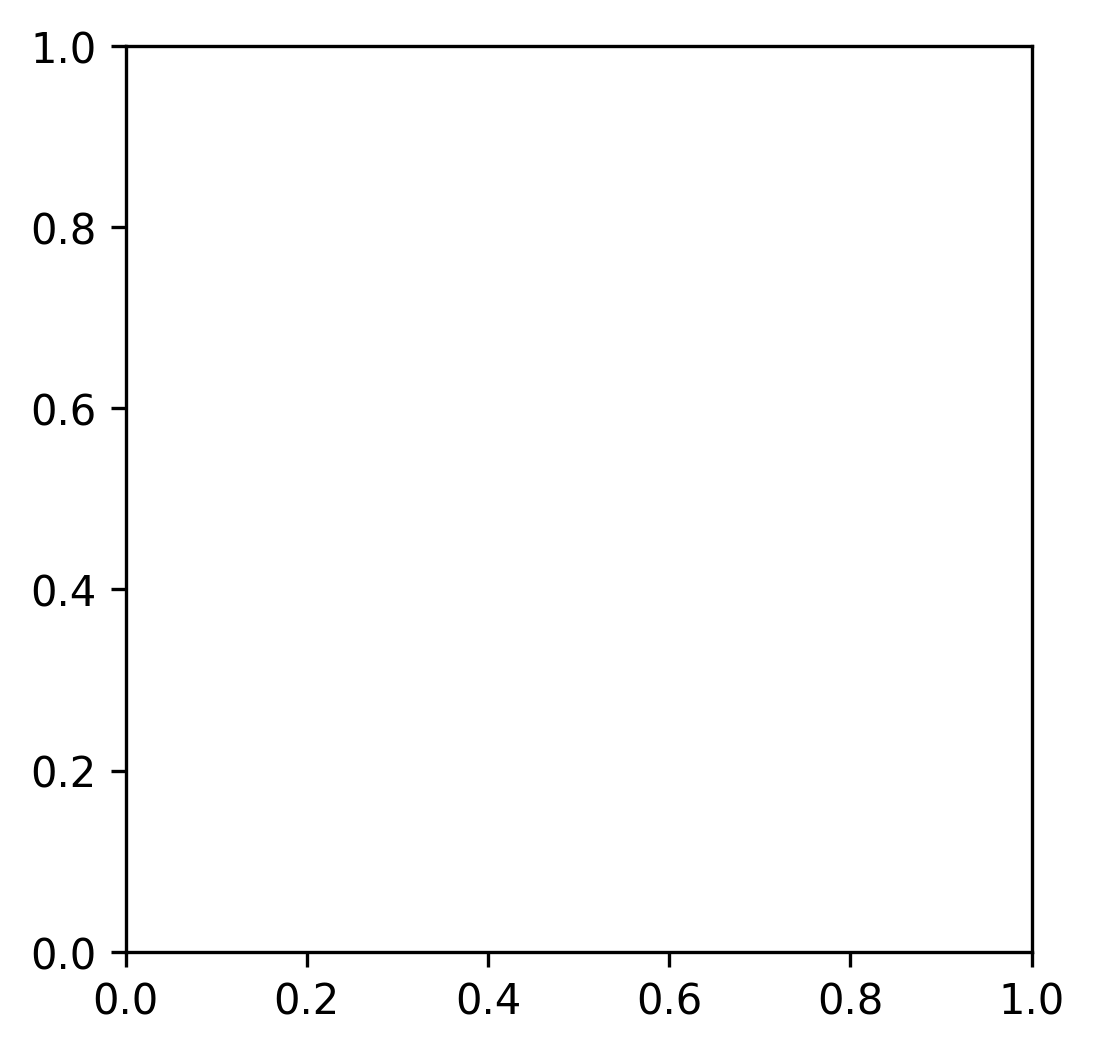

In [11]:
file_index = 0
page_index =0
to_check  = 'words'

regions    = resp['outputs'][file_index]['pages'][page_index][to_check]
page_path = resp['outputs'][file_index]['page_info'][page_index]


draw_region(page_path,regions)

In [ ]:
page_path

In [ ]:
page_image

In [ ]:
stng = {'code': 200, 'message': 'request completed', 'rsp': {'input': {'inputs': [{'file': {'identifier': 'string', 'name': 'ncert.pdf', 'type': 'PDF'}, 'config': {'OCR': {'option': 'HIGH_ACCURACY', 'language': 'hi'}}, 'pages': '/home/naresh/anuvaad/anuvaad-etl/anuvaad-extractor/document-processor/word-detector/craft/upload/0-1607418921477345.json'}]}, 'jobID': 'BM-15913540488115873', 'state': 'INITIATED', 'status': 'STARTED', 'stepOrder': 0, 'workflowCode': 'abc', 'taskID': 'aaabbbba', 'tool': 'BM', 'message': 'layout', 'metadata': {'module': 'WORKFLOW-MANAGER', 'receivedAt': 15993163946431696, 'sessionID': '4M1qOZj53tIZsCoLNzP0oP', 'userID': 'd4e0b570-b72a-44e5-9110-5fdd54370a9d'}, 'outputs': [{'file': {'identifier': '071a28c8-5785-4c5a-9819-c9459ac5d3fe', 'name': 'bengali_1_singlecolumn.pdf', 'format': 'PDF'}, 'config': {'OCR': {'option': 'HIGH_ACCURACY', 'language': 'en'}}, 'pages': [{'identifier': '00d3c9ea-d5c8-4e94-97e9-5bd044ec30f9', 'vertices': [{'x': 0, 'y': 0}, {'x': 2481, 'y': 0}, {'x': 2481, 'y': 3508}, {'x': 0, 'y': 3508}], 'resolution': 300, 'regions': [{'identifier': 'fb682cd5-57dd-4ebf-8dc5-084e2c0ea3a0', 'boundingBox': {'vertices': [{'x': 0, 'y': 25}, {'x': 2463, 'y': 25}, {'x': 2463, 'y': 3464}, {'x': 0, 'y': 3464}]}, 'class': 'IMAGE'}, {'identifier': 'a66ac509-2bb1-49c7-95b7-66ea3efb5ef0', 'boundingBox': {'vertices': [{'x': 491, 'y': 2838}, {'x': 773, 'y': 2838}, {'x': 773, 'y': 2730}, {'x': 491, 'y': 2730}]}, 'class': 'TEXT'}], 'words': [{'boundingBox': {'vertices': [{'x': 1260, 'y': 374}, {'x': 1634, 'y': 380}, {'x': 1632, 'y': 537}, {'x': 1258, 'y': 531}]}, 'identifier': 'aa8b158c-a109-4a2c-9db1-13216212682b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 157, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 852, 'y': 576}, {'x': 2028, 'y': 512}, {'x': 2046, 'y': 848}, {'x': 870, 'y': 913}]}, 'identifier': 'a82d603d-d0cb-41b6-a9b3-e84965b01a35', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 337, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1467, 'y': 884}, {'x': 1812, 'y': 884}, {'x': 1812, 'y': 1077}, {'x': 1467, 'y': 1077}]}, 'identifier': '9e23ca36-63fe-4700-a216-a3e554d75376', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 193, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1077, 'y': 920}, {'x': 1428, 'y': 920}, {'x': 1428, 'y': 1077}, {'x': 1077, 'y': 1077}]}, 'identifier': '085035fb-6f0f-48f9-8814-63120a45bdfa', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 157, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 2225, 'y': 1431}, {'x': 2270, 'y': 1431}, {'x': 2270, 'y': 1478}, {'x': 2225, 'y': 1478}]}, 'identifier': 'c6ac3239-08a6-4a2f-863c-1f457db5cb61', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 2132, 'y': 1501}, {'x': 2183, 'y': 1501}, {'x': 2183, 'y': 1565}, {'x': 2132, 'y': 1565}]}, 'identifier': '894d6d53-8960-4262-b09e-55ace8b29c7b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1742, 'y': 1784}, {'x': 1787, 'y': 1784}, {'x': 1787, 'y': 1818}, {'x': 1742, 'y': 1818}]}, 'identifier': 'e3eff886-e9f4-4650-b574-ab35209cf676', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 34, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 404, 'y': 1933}, {'x': 415, 'y': 1933}, {'x': 415, 'y': 1953}, {'x': 404, 'y': 1953}]}, 'identifier': '4abdfedc-3e8a-435b-b8a2-5865a372b52d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 20, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1723, 'y': 2514}, {'x': 1815, 'y': 2514}, {'x': 1815, 'y': 2576}, {'x': 1723, 'y': 2576}]}, 'identifier': '79641468-168f-4fca-87b6-0047a9732981', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1745, 'y': 2581}, {'x': 1815, 'y': 2581}, {'x': 1815, 'y': 2607}, {'x': 1745, 'y': 2607}]}, 'identifier': '509e0e92-8c34-499f-960d-330a62b63c8d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 26, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 491, 'y': 2838}, {'x': 742, 'y': 2680}, {'x': 773, 'y': 2730}, {'x': 522, 'y': 2888}]}, 'identifier': 'f2c49d31-11a0-406e-9dac-f978de3f252b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}], 'lines': [{'boundingBox': {'vertices': [{'x': 1263, 'y': 377}, {'x': 1634, 'y': 383}, {'x': 1632, 'y': 537}, {'x': 1260, 'y': 531}]}, 'identifier': 'ec61dfc7-676f-430f-a6ea-63cc4935e403', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 154, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 852, 'y': 576}, {'x': 2028, 'y': 512}, {'x': 2046, 'y': 848}, {'x': 870, 'y': 913}]}, 'identifier': 'e2d4333d-3388-4067-a93b-7d40ab40143f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 337, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1076, 'y': 888}, {'x': 1809, 'y': 883}, {'x': 1810, 'y': 1074}, {'x': 1078, 'y': 1079}]}, 'identifier': 'd8f2a125-2f68-42bf-b970-8c322281f6f8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 191, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 2225, 'y': 1431}, {'x': 2270, 'y': 1431}, {'x': 2270, 'y': 1478}, {'x': 2225, 'y': 1478}]}, 'identifier': 'e71329fe-98cc-4bf3-aec4-cee1c67dcb5f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 2132, 'y': 1501}, {'x': 2183, 'y': 1501}, {'x': 2183, 'y': 1565}, {'x': 2132, 'y': 1565}]}, 'identifier': '1b765c66-a04c-46bf-bb43-efbd12aa4a2b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1742, 'y': 1784}, {'x': 1787, 'y': 1784}, {'x': 1787, 'y': 1818}, {'x': 1742, 'y': 1818}]}, 'identifier': '81885a5c-3873-4901-9b16-eabe45d7210c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 34, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 404, 'y': 1933}, {'x': 415, 'y': 1933}, {'x': 415, 'y': 1953}, {'x': 404, 'y': 1953}]}, 'identifier': '443ccff5-a4df-41c2-b7b3-30e87ed7b430', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 20, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1723, 'y': 2514}, {'x': 1812, 'y': 2514}, {'x': 1812, 'y': 2573}, {'x': 1723, 'y': 2573}]}, 'identifier': 'c15f551f-356c-4c99-a82b-f64ae93472a0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1745, 'y': 2581}, {'x': 1815, 'y': 2581}, {'x': 1815, 'y': 2607}, {'x': 1745, 'y': 2607}]}, 'identifier': '3957d359-0df9-4f78-abe5-b7ca8f79bb4b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 26, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 491, 'y': 2838}, {'x': 742, 'y': 2680}, {'x': 773, 'y': 2730}, {'x': 522, 'y': 2888}]}, 'identifier': '7c0d3ed3-0d20-4a37-975d-84cf544bb3ae', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}]}, {'identifier': 'aa4f39af-ebfa-4cde-a841-66ba9531cd55', 'vertices': [{'x': 0, 'y': 0}, {'x': 2481, 'y': 0}, {'x': 2481, 'y': 3508}, {'x': 0, 'y': 3508}], 'resolution': 300, 'regions': [{'identifier': '52308da6-e65f-495c-aa06-b77ace136fc9', 'boundingBox': {'vertices': [{'x': 263, 'y': 346}, {'x': 2358.645263671875, 'y': 346}, {'x': 2358.645263671875, 'y': 3278.911865234375}, {'x': 263, 'y': 3278.911865234375}]}, 'class': 'IMAGE'}, {'identifier': 'ddf3396a-c76b-43bf-b9d2-1cb66f8a13c7', 'boundingBox': {'vertices': [{'x': 0, 'y': 0}, {'x': 0, 'y': 0}, {'x': 0, 'y': 0}, {'x': 0, 'y': 0}]}, 'class': 'TEXT'}], 'words': [{'boundingBox': {'vertices': [{'x': 600, 'y': 555}, {'x': 679, 'y': 555}, {'x': 679, 'y': 606}, {'x': 600, 'y': 606}]}, 'identifier': '9dea7d58-f099-41e1-98f8-c3c1983d5b2e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1243, 'y': 561}, {'x': 1363, 'y': 561}, {'x': 1363, 'y': 606}, {'x': 1243, 'y': 606}]}, 'identifier': '40683979-efba-4a5f-a7bb-77ca9b9191c6', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1366, 'y': 561}, {'x': 1535, 'y': 561}, {'x': 1535, 'y': 606}, {'x': 1366, 'y': 606}]}, 'identifier': 'a40e55f6-3a5c-43c7-a3a5-fe9553f7b65b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1677, 'y': 567}, {'x': 1791, 'y': 554}, {'x': 1798, 'y': 607}, {'x': 1683, 'y': 621}]}, 'identifier': '89f6ae70-37fb-46da-a8e4-1e95d5bae74e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1793, 'y': 558}, {'x': 1891, 'y': 558}, {'x': 1891, 'y': 606}, {'x': 1793, 'y': 606}]}, 'identifier': '56ab0843-354f-487c-8403-de69adec7c82', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 951, 'y': 566}, {'x': 1128, 'y': 566}, {'x': 1128, 'y': 608}, {'x': 951, 'y': 608}]}, 'identifier': '75d21de3-3f45-4416-878e-910f063f8825', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 519, 'y': 569}, {'x': 600, 'y': 569}, {'x': 600, 'y': 606}, {'x': 519, 'y': 606}]}, 'identifier': '71011778-cbe9-438a-bb28-90b6b862e3c0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 681, 'y': 569}, {'x': 771, 'y': 569}, {'x': 771, 'y': 606}, {'x': 681, 'y': 606}]}, 'identifier': 'ee3f2ccb-d965-4db1-95e5-e8fa335fd347', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 797, 'y': 569}, {'x': 895, 'y': 569}, {'x': 895, 'y': 606}, {'x': 797, 'y': 606}]}, 'identifier': 'a419c509-b630-43e0-bb48-939261410373', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 926, 'y': 569}, {'x': 954, 'y': 569}, {'x': 954, 'y': 603}, {'x': 926, 'y': 603}]}, 'identifier': '96c88c92-1fc0-4697-a44f-1474204e429e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 34, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1119, 'y': 569}, {'x': 1240, 'y': 569}, {'x': 1240, 'y': 608}, {'x': 1119, 'y': 608}]}, 'identifier': '0773c697-2e0f-4fad-81eb-21944e5e9528', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 39, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1526, 'y': 569}, {'x': 1681, 'y': 569}, {'x': 1681, 'y': 606}, {'x': 1526, 'y': 606}]}, 'identifier': 'bbf0b832-4a76-497b-801c-5cca7e896516', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1891, 'y': 569}, {'x': 1950, 'y': 569}, {'x': 1950, 'y': 606}, {'x': 1891, 'y': 606}]}, 'identifier': '309f75bc-cf0d-4ac8-956d-7793a90e01fe', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1956, 'y': 572}, {'x': 2043, 'y': 572}, {'x': 2043, 'y': 606}, {'x': 1956, 'y': 606}]}, 'identifier': 'df6d4ef6-9f5f-488e-9a7b-1dbcd43ed42b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 34, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 774, 'y': 578}, {'x': 785, 'y': 578}, {'x': 785, 'y': 597}, {'x': 774, 'y': 597}]}, 'identifier': '61f9c0b2-5493-417f-8800-db820918e503', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 19, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 900, 'y': 580}, {'x': 917, 'y': 580}, {'x': 917, 'y': 594}, {'x': 900, 'y': 594}]}, 'identifier': '2579a1d4-b91d-4ec5-9193-30b65fe1fc14', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 14, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 625, 'y': 611}, {'x': 738, 'y': 611}, {'x': 738, 'y': 662}, {'x': 625, 'y': 662}]}, 'identifier': '7d6eef53-508c-48d0-9177-42791c0a114e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1369, 'y': 611}, {'x': 1481, 'y': 611}, {'x': 1481, 'y': 665}, {'x': 1369, 'y': 665}]}, 'identifier': '54156f13-618b-4d1c-86a5-9c0a4916b4d5', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 735, 'y': 614}, {'x': 827, 'y': 614}, {'x': 827, 'y': 662}, {'x': 735, 'y': 662}]}, 'identifier': '7020d098-0be5-460b-9366-bd4bbef807fe', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1184, 'y': 614}, {'x': 1237, 'y': 614}, {'x': 1237, 'y': 662}, {'x': 1184, 'y': 662}]}, 'identifier': 'de64e4be-a844-48af-892a-132712bb3836', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1234, 'y': 614}, {'x': 1375, 'y': 614}, {'x': 1375, 'y': 670}, {'x': 1234, 'y': 670}]}, 'identifier': '9d1fe717-fb3e-4a3b-8deb-8a2450fc2bfe', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1100, 'y': 623}, {'x': 1181, 'y': 623}, {'x': 1181, 'y': 662}, {'x': 1100, 'y': 662}]}, 'identifier': '57f2c530-5fef-42d4-b5e5-94b2bd94dd87', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 39, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 833, 'y': 625}, {'x': 898, 'y': 625}, {'x': 898, 'y': 656}, {'x': 833, 'y': 656}]}, 'identifier': '5178b084-3308-4b9f-ac6e-0caf1ac11e4f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 31, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 889, 'y': 625}, {'x': 1041, 'y': 625}, {'x': 1041, 'y': 659}, {'x': 889, 'y': 659}]}, 'identifier': 'dabb84f9-f62c-4882-b817-2cd995b4b4ca', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 34, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1049, 'y': 625}, {'x': 1100, 'y': 625}, {'x': 1100, 'y': 662}, {'x': 1049, 'y': 662}]}, 'identifier': 'd8e4708b-cbab-4a3f-941d-064af054cc73', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1481, 'y': 625}, {'x': 1560, 'y': 625}, {'x': 1560, 'y': 662}, {'x': 1481, 'y': 662}]}, 'identifier': '4696ad67-7201-484f-9429-d8bfe0e07904', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1563, 'y': 625}, {'x': 1627, 'y': 625}, {'x': 1627, 'y': 662}, {'x': 1563, 'y': 662}]}, 'identifier': 'e2d333a3-869b-4e2f-a4a1-c1abe345b038', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1627, 'y': 625}, {'x': 1725, 'y': 625}, {'x': 1725, 'y': 662}, {'x': 1627, 'y': 662}]}, 'identifier': '9dec2da7-6319-42e7-b356-d207fb8aada0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1728, 'y': 625}, {'x': 1818, 'y': 625}, {'x': 1818, 'y': 662}, {'x': 1728, 'y': 662}]}, 'identifier': '6d49be25-f9c4-429e-a69f-3acf7ac798ad', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1821, 'y': 625}, {'x': 1916, 'y': 625}, {'x': 1916, 'y': 662}, {'x': 1821, 'y': 662}]}, 'identifier': '989437c2-21d6-435d-a72c-3a211021c16f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1916, 'y': 631}, {'x': 1930, 'y': 631}, {'x': 1930, 'y': 656}, {'x': 1916, 'y': 656}]}, 'identifier': '6da5b51e-8d18-46b3-a5c7-33b282a57ec5', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 25, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1170, 'y': 710}, {'x': 1349, 'y': 710}, {'x': 1349, 'y': 788}, {'x': 1170, 'y': 788}]}, 'identifier': '8368fdfb-c0cf-4d4d-9bd2-601a926fbcca', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 78, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 967, 'y': 811}, {'x': 1559, 'y': 770}, {'x': 1571, 'y': 932}, {'x': 979, 'y': 974}]}, 'identifier': '6fc0b2a9-65e0-4406-baed-9ec08a428ce7', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 163, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1279, 'y': 971}, {'x': 1473, 'y': 971}, {'x': 1473, 'y': 1074}, {'x': 1279, 'y': 1074}]}, 'identifier': 'd25e5d63-6193-47c6-8f07-73c85736543b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 103, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1066, 'y': 979}, {'x': 1262, 'y': 979}, {'x': 1262, 'y': 1072}, {'x': 1066, 'y': 1072}]}, 'identifier': 'f6b3d8cc-75cc-4788-854d-2557cccda281', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 93, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1333, 'y': 1159}, {'x': 1372, 'y': 1159}, {'x': 1372, 'y': 1220}, {'x': 1333, 'y': 1220}]}, 'identifier': 'cfa37177-c267-4b52-bacf-eff0308963b3', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1369, 'y': 1167}, {'x': 1400, 'y': 1167}, {'x': 1400, 'y': 1215}, {'x': 1369, 'y': 1215}]}, 'identifier': '07b17c84-4c13-40b2-9e43-9dadc36ce39c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1299, 'y': 1175}, {'x': 1321, 'y': 1175}, {'x': 1321, 'y': 1217}, {'x': 1299, 'y': 1217}]}, 'identifier': '58168e0a-91b9-4ec2-b95a-66fe0ac5b398', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1414, 'y': 1206}, {'x': 1453, 'y': 1206}, {'x': 1453, 'y': 1248}, {'x': 1414, 'y': 1248}]}, 'identifier': 'e9ac83ea-cdca-414d-bc14-074ef7dac63f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1165, 'y': 1814}, {'x': 1210, 'y': 1842}, {'x': 1195, 'y': 1866}, {'x': 1150, 'y': 1838}]}, 'identifier': 'c056a91d-af5b-4479-96c4-3045407fbcf7', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 24, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1337, 'y': 1855}, {'x': 1391, 'y': 1830}, {'x': 1400, 'y': 1851}, {'x': 1347, 'y': 1876}]}, 'identifier': 'e131dd9f-fdb3-48ea-aa16-db0874bfb8e4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 21, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1198, 'y': 1843}, {'x': 1215, 'y': 1843}, {'x': 1215, 'y': 1863}, {'x': 1198, 'y': 1863}]}, 'identifier': 'ff5a522f-9dea-45ec-88bc-b20ec8a9ee1b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 20, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1212, 'y': 1849}, {'x': 1229, 'y': 1849}, {'x': 1229, 'y': 1869}, {'x': 1212, 'y': 1869}]}, 'identifier': 'cafe6404-188a-4767-9136-aeb47c44ce65', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 20, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1226, 'y': 1851}, {'x': 1347, 'y': 1855}, {'x': 1346, 'y': 1882}, {'x': 1225, 'y': 1878}]}, 'identifier': '3204200c-47f7-40cf-a385-6ebb08b0a35d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 27, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 962, 'y': 2222}, {'x': 1010, 'y': 2222}, {'x': 1010, 'y': 2273}, {'x': 962, 'y': 2273}]}, 'identifier': 'a841d825-01c6-4b32-9665-8fc9de48ae98', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1074, 'y': 2239}, {'x': 1130, 'y': 2239}, {'x': 1130, 'y': 2278}, {'x': 1074, 'y': 2278}]}, 'identifier': '07678272-95f6-4e91-bc63-2314612de818', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 39, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1203, 'y': 2250}, {'x': 1232, 'y': 2250}, {'x': 1232, 'y': 2275}, {'x': 1203, 'y': 2275}]}, 'identifier': '5227f3fc-9fe2-4aed-ac11-ccc685c7806f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 25, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1128, 'y': 2253}, {'x': 1170, 'y': 2253}, {'x': 1170, 'y': 2275}, {'x': 1128, 'y': 2275}]}, 'identifier': 'a5d9b890-e611-413b-893a-d70e8e1c860e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 22, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 665, 'y': 2365}, {'x': 684, 'y': 2365}, {'x': 684, 'y': 2382}, {'x': 665, 'y': 2382}]}, 'identifier': '03ef469d-fa4f-4442-836d-ecaaaef5cb66', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 17, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 675, 'y': 2370}, {'x': 697, 'y': 2359}, {'x': 722, 'y': 2406}, {'x': 701, 'y': 2418}]}, 'identifier': '7f6c51c4-3ff4-4e92-9e84-935fafa0bf87', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 634, 'y': 2368}, {'x': 667, 'y': 2368}, {'x': 667, 'y': 2402}, {'x': 634, 'y': 2402}]}, 'identifier': 'fa68a2b1-a6ea-48d4-89fd-22f7384f5ba0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 34, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 659, 'y': 2379}, {'x': 690, 'y': 2379}, {'x': 690, 'y': 2416}, {'x': 659, 'y': 2416}]}, 'identifier': 'b6688ec5-1ac1-4de8-a3a3-cdaaee2de9fd', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 639, 'y': 2399}, {'x': 659, 'y': 2399}, {'x': 659, 'y': 2416}, {'x': 639, 'y': 2416}]}, 'identifier': 'b5943b0a-1091-42d8-b400-d1ff3dc8ac19', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 17, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1232, 'y': 2419}, {'x': 1369, 'y': 2419}, {'x': 1369, 'y': 2483}, {'x': 1232, 'y': 2483}]}, 'identifier': '6d075bbd-7df1-4e4b-8b67-c9c64dfbc0ff', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1050, 'y': 2418}, {'x': 1237, 'y': 2428}, {'x': 1233, 'y': 2499}, {'x': 1046, 'y': 2489}]}, 'identifier': 'a9ebda9d-1a32-4941-bf33-b9738cce1270', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 71, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 808, 'y': 2424}, {'x': 945, 'y': 2424}, {'x': 945, 'y': 2486}, {'x': 808, 'y': 2486}]}, 'identifier': '4524290b-213f-42b8-a9c5-b8c750f80b01', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 715, 'y': 2448}, {'x': 765, 'y': 2423}, {'x': 777, 'y': 2448}, {'x': 727, 'y': 2473}]}, 'identifier': 'e93c5e4c-c4bb-4718-a248-8cc043915856', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 25, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 948, 'y': 2430}, {'x': 1046, 'y': 2430}, {'x': 1046, 'y': 2480}, {'x': 948, 'y': 2480}]}, 'identifier': '2c655599-2198-4cbe-9c26-1d49fc6df09f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1616, 'y': 2430}, {'x': 1787, 'y': 2430}, {'x': 1787, 'y': 2480}, {'x': 1616, 'y': 2480}]}, 'identifier': '15ac0712-58a6-4d05-9ed8-fbc8747d6cc1', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1917, 'y': 2433}, {'x': 2006, 'y': 2428}, {'x': 2009, 'y': 2488}, {'x': 1921, 'y': 2494}]}, 'identifier': 'b898b697-54bd-4acf-b94d-878d58229495', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1377, 'y': 2435}, {'x': 1408, 'y': 2435}, {'x': 1408, 'y': 2472}, {'x': 1377, 'y': 2472}]}, 'identifier': '6dc3c144-ecd0-4d4b-b1ab-083e8a03a7d5', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1417, 'y': 2433}, {'x': 1613, 'y': 2433}, {'x': 1613, 'y': 2483}, {'x': 1417, 'y': 2483}]}, 'identifier': '52f2542f-3e33-47ac-9f94-9aa3d77d5c63', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1790, 'y': 2433}, {'x': 1913, 'y': 2433}, {'x': 1913, 'y': 2486}, {'x': 1790, 'y': 2486}]}, 'identifier': '4a546db4-b5f4-4ba6-bdb3-30a074fbea46', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 592, 'y': 2438}, {'x': 635, 'y': 2448}, {'x': 630, 'y': 2470}, {'x': 587, 'y': 2459}]}, 'identifier': 'b1ea5c63-2e17-4e83-aab9-fbe9d01fad96', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 21, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 660, 'y': 2464}, {'x': 729, 'y': 2453}, {'x': 732, 'y': 2474}, {'x': 663, 'y': 2485}]}, 'identifier': 'ecfb6e71-fa1d-46a7-b9e8-cd69a939460d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 21, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 631, 'y': 2458}, {'x': 662, 'y': 2458}, {'x': 662, 'y': 2475}, {'x': 631, 'y': 2475}]}, 'identifier': 'ed03a716-3904-498d-8054-02c8194d3595', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 17, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 611, 'y': 2469}, {'x': 754, 'y': 2463}, {'x': 756, 'y': 2493}, {'x': 612, 'y': 2500}]}, 'identifier': 'd941b88d-587d-44f5-b960-f8fd9d9906f1', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 31, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1091, 'y': 2570}, {'x': 1302, 'y': 2570}, {'x': 1302, 'y': 2632}, {'x': 1091, 'y': 2632}]}, 'identifier': 'fed31987-7149-46e0-b4f5-c9e8af1dceec', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1783, 'y': 2569}, {'x': 1994, 'y': 2582}, {'x': 1990, 'y': 2645}, {'x': 1779, 'y': 2632}]}, 'identifier': '6959203a-1e38-40e2-9a95-e54da90d99b2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 63, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1330, 'y': 2576}, {'x': 1521, 'y': 2576}, {'x': 1521, 'y': 2626}, {'x': 1330, 'y': 2626}]}, 'identifier': 'faf0bc33-6b98-416f-8861-58e295ed1e8a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1549, 'y': 2576}, {'x': 1652, 'y': 2576}, {'x': 1652, 'y': 2626}, {'x': 1549, 'y': 2626}]}, 'identifier': '4f5ce5a8-b0e6-4e28-b28c-1fc5cb0640c8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 926, 'y': 2578}, {'x': 1070, 'y': 2581}, {'x': 1068, 'y': 2631}, {'x': 924, 'y': 2628}]}, 'identifier': '6e650337-ae71-42b4-af0c-fed07aad7f03', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1681, 'y': 2581}, {'x': 1759, 'y': 2581}, {'x': 1759, 'y': 2626}, {'x': 1681, 'y': 2626}]}, 'identifier': '336db98f-7a1e-4f6f-90a7-3d47219314fa', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1563, 'y': 2641}, {'x': 1722, 'y': 2646}, {'x': 1719, 'y': 2710}, {'x': 1561, 'y': 2705}]}, 'identifier': '9734a7c1-6c83-4c3d-892f-e6f8a49f6203', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1029, 'y': 2649}, {'x': 1128, 'y': 2649}, {'x': 1128, 'y': 2708}, {'x': 1029, 'y': 2708}]}, 'identifier': 'd421be55-8571-4ed9-945c-89514ed472fb', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1728, 'y': 2649}, {'x': 1899, 'y': 2649}, {'x': 1899, 'y': 2713}, {'x': 1728, 'y': 2713}]}, 'identifier': '086179a9-db32-4444-a442-1269de490028', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1142, 'y': 2652}, {'x': 1234, 'y': 2652}, {'x': 1234, 'y': 2708}, {'x': 1142, 'y': 2708}]}, 'identifier': '0e9c8e9c-352a-4f1a-b7f8-541a55342e3e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 926, 'y': 2654}, {'x': 1015, 'y': 2654}, {'x': 1015, 'y': 2705}, {'x': 926, 'y': 2705}]}, 'identifier': 'c57669f5-278f-4dce-bb3b-509eecfa7d8b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1223, 'y': 2654}, {'x': 1341, 'y': 2654}, {'x': 1341, 'y': 2702}, {'x': 1223, 'y': 2702}]}, 'identifier': '389468a7-b468-4e51-b9e2-1486884d1a6b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1355, 'y': 2660}, {'x': 1417, 'y': 2660}, {'x': 1417, 'y': 2702}, {'x': 1355, 'y': 2702}]}, 'identifier': '4d976874-e19a-4c8b-b572-e0160ad866f8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1428, 'y': 2657}, {'x': 1551, 'y': 2657}, {'x': 1551, 'y': 2705}, {'x': 1428, 'y': 2705}]}, 'identifier': '155377ed-84f0-4761-b982-d89a8aabd4b8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1911, 'y': 2657}, {'x': 1992, 'y': 2657}, {'x': 1992, 'y': 2705}, {'x': 1911, 'y': 2705}]}, 'identifier': '6be852ed-4539-4ae4-83ac-2333ca8ea485', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 928, 'y': 2722}, {'x': 1038, 'y': 2722}, {'x': 1038, 'y': 2778}, {'x': 928, 'y': 2778}]}, 'identifier': '4085dc70-b482-4f3e-b095-b9644f4364df', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1673, 'y': 2718}, {'x': 1808, 'y': 2734}, {'x': 1801, 'y': 2796}, {'x': 1666, 'y': 2780}]}, 'identifier': 'a175272e-b8be-4a5d-9e1a-f932a648d2a1', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1212, 'y': 2730}, {'x': 1535, 'y': 2730}, {'x': 1535, 'y': 2781}, {'x': 1212, 'y': 2781}]}, 'identifier': '043f13c9-eb81-4923-8bdd-4ecfce8f9348', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1833, 'y': 2734}, {'x': 1992, 'y': 2726}, {'x': 1994, 'y': 2779}, {'x': 1836, 'y': 2788}]}, 'identifier': 'fe5e6dc8-c1f6-4572-bfb5-f8f74b815ed8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1069, 'y': 2736}, {'x': 1181, 'y': 2736}, {'x': 1181, 'y': 2781}, {'x': 1069, 'y': 2781}]}, 'identifier': 'a3d0c808-2326-4879-9570-e38368ec25a2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1568, 'y': 2736}, {'x': 1644, 'y': 2736}, {'x': 1644, 'y': 2778}, {'x': 1568, 'y': 2778}]}, 'identifier': '7b27e03c-7d17-4c6d-ae02-11b219eef780', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 926, 'y': 2797}, {'x': 1049, 'y': 2797}, {'x': 1049, 'y': 2856}, {'x': 926, 'y': 2856}]}, 'identifier': '6b416584-ad21-4d16-81c9-e22bf477b275', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1067, 'y': 2795}, {'x': 1198, 'y': 2807}, {'x': 1193, 'y': 2862}, {'x': 1061, 'y': 2849}]}, 'identifier': 'e4f9316d-9de4-4f2b-8399-1be8e5af128e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1212, 'y': 2809}, {'x': 1290, 'y': 2809}, {'x': 1290, 'y': 2854}, {'x': 1212, 'y': 2854}]}, 'identifier': '86d48c18-0d65-4264-843a-0e1f1f6da563', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1293, 'y': 2820}, {'x': 1310, 'y': 2820}, {'x': 1310, 'y': 2845}, {'x': 1293, 'y': 2845}]}, 'identifier': '296f59e2-4568-4760-800a-79083c423168', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 25, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 625, 'y': 2842}, {'x': 850, 'y': 2842}, {'x': 850, 'y': 2890}, {'x': 625, 'y': 2890}]}, 'identifier': 'a022fdd6-e7dd-401c-80cd-25ca4aaafb32', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}], 'lines': [{'boundingBox': {'vertices': [{'x': 519, 'y': 558}, {'x': 2043, 'y': 561}, {'x': 2043, 'y': 615}, {'x': 519, 'y': 611}]}, 'identifier': 'bb7d2617-95ba-44dd-a98b-f1abe98689b8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 628, 'y': 614}, {'x': 1933, 'y': 614}, {'x': 1933, 'y': 670}, {'x': 628, 'y': 670}]}, 'identifier': '6a718330-f2a0-42f7-9c54-629639bd2120', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1170, 'y': 710}, {'x': 1349, 'y': 710}, {'x': 1349, 'y': 788}, {'x': 1170, 'y': 788}]}, 'identifier': '6a34998a-288a-4b57-b969-18940f4d4998', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 78, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 967, 'y': 811}, {'x': 1559, 'y': 770}, {'x': 1571, 'y': 932}, {'x': 979, 'y': 974}]}, 'identifier': '69526187-57cc-4d16-9718-403d7afc14fe', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 163, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1064, 'y': 982}, {'x': 1469, 'y': 968}, {'x': 1473, 'y': 1069}, {'x': 1068, 'y': 1083}]}, 'identifier': '46daf664-21b7-494b-8ef3-a02a829d9f3e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 101, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1333, 'y': 1159}, {'x': 1372, 'y': 1159}, {'x': 1372, 'y': 1220}, {'x': 1333, 'y': 1220}]}, 'identifier': 'c790bace-0585-4b81-9139-4d1e4a05dfe2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1369, 'y': 1167}, {'x': 1403, 'y': 1167}, {'x': 1403, 'y': 1217}, {'x': 1369, 'y': 1217}]}, 'identifier': '47db8fdb-104b-4b2f-bb93-663bba52cca2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1299, 'y': 1175}, {'x': 1321, 'y': 1175}, {'x': 1321, 'y': 1217}, {'x': 1299, 'y': 1217}]}, 'identifier': '31536e08-dba9-4446-8ce1-c9ac1c78060b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1414, 'y': 1206}, {'x': 1453, 'y': 1206}, {'x': 1453, 'y': 1248}, {'x': 1414, 'y': 1248}]}, 'identifier': '49d6365a-50fa-4199-ac11-af19d57e1b85', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 0, 'y': 0}, {'x': 0, 'y': 0}, {'x': 0, 'y': 0}, {'x': 0, 'y': 0}]}, 'identifier': '227eff8b-33c2-4da9-a6fb-04860531ab57', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 0, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 0, 'y': 0}, {'x': 0, 'y': 0}, {'x': 0, 'y': 0}, {'x': 0, 'y': 0}]}, 'identifier': '38332b86-9618-4048-a3f7-9c1240724e0e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 0, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1162, 'y': 1823}, {'x': 1395, 'y': 1835}, {'x': 1392, 'y': 1886}, {'x': 1159, 'y': 1874}]}, 'identifier': '089dd952-2f69-4916-886b-d6d1f916c361', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 965, 'y': 2225}, {'x': 1010, 'y': 2225}, {'x': 1010, 'y': 2273}, {'x': 965, 'y': 2273}]}, 'identifier': '1633c641-b2f6-4568-8bfd-c68b8fad94f3', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 0, 'y': 0}, {'x': 0, 'y': 0}, {'x': 0, 'y': 0}, {'x': 0, 'y': 0}]}, 'identifier': 'd76d4682-a69b-4577-9138-10a3776c80e4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 0, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1074, 'y': 2239}, {'x': 1128, 'y': 2239}, {'x': 1128, 'y': 2275}, {'x': 1074, 'y': 2275}]}, 'identifier': '7c3c82cc-bfc2-4e6d-9557-16518170962d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 36, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1203, 'y': 2250}, {'x': 1232, 'y': 2250}, {'x': 1232, 'y': 2275}, {'x': 1203, 'y': 2275}]}, 'identifier': '221cf7fd-2ac0-4567-9c91-b96d153600ef', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 25, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1128, 'y': 2253}, {'x': 1170, 'y': 2253}, {'x': 1170, 'y': 2275}, {'x': 1128, 'y': 2275}]}, 'identifier': 'e79a9549-6808-451f-b2fd-a48dd033ccff', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 22, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 665, 'y': 2365}, {'x': 684, 'y': 2365}, {'x': 684, 'y': 2382}, {'x': 665, 'y': 2382}]}, 'identifier': 'bd8590a3-9a49-4e74-aea6-3c1bd80101fb', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 17, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 675, 'y': 2370}, {'x': 697, 'y': 2359}, {'x': 722, 'y': 2406}, {'x': 701, 'y': 2418}]}, 'identifier': '7d230d34-b05c-490c-aa5b-4ff674108f8a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 634, 'y': 2368}, {'x': 667, 'y': 2368}, {'x': 667, 'y': 2402}, {'x': 634, 'y': 2402}]}, 'identifier': 'f1ebfdad-5869-4560-b039-5598010c0d49', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 34, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 659, 'y': 2379}, {'x': 690, 'y': 2379}, {'x': 690, 'y': 2416}, {'x': 659, 'y': 2416}]}, 'identifier': '5f6ac0c2-d26b-4cc7-8977-12286be5ce0f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 639, 'y': 2399}, {'x': 659, 'y': 2399}, {'x': 659, 'y': 2416}, {'x': 639, 'y': 2416}]}, 'identifier': '09a3620d-8f1e-47c2-80de-394338951ba3', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 17, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 808, 'y': 2419}, {'x': 2006, 'y': 2419}, {'x': 2006, 'y': 2492}, {'x': 808, 'y': 2492}]}, 'identifier': '3ee6367b-4b02-494d-b9ce-47d08de455c9', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 73, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 715, 'y': 2448}, {'x': 765, 'y': 2423}, {'x': 777, 'y': 2448}, {'x': 727, 'y': 2473}]}, 'identifier': 'a8555735-9e63-477a-aa36-f99e17d2b6f6', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 25, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 592, 'y': 2438}, {'x': 635, 'y': 2448}, {'x': 630, 'y': 2470}, {'x': 587, 'y': 2459}]}, 'identifier': '2fa2bb64-8063-4c65-989d-2aeeaeeabfd5', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 21, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 631, 'y': 2458}, {'x': 729, 'y': 2455}, {'x': 730, 'y': 2477}, {'x': 631, 'y': 2480}]}, 'identifier': '48de6c58-e938-40df-adef-a2115bdaece1', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 22, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 611, 'y': 2469}, {'x': 754, 'y': 2463}, {'x': 756, 'y': 2493}, {'x': 612, 'y': 2500}]}, 'identifier': '39bbc262-5889-439e-8140-f2b030215106', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 31, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1091, 'y': 2570}, {'x': 1302, 'y': 2570}, {'x': 1302, 'y': 2632}, {'x': 1091, 'y': 2632}]}, 'identifier': 'dc3d1624-9e7a-466e-9c5a-0581e67ea6fb', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1682, 'y': 2563}, {'x': 1994, 'y': 2582}, {'x': 1990, 'y': 2645}, {'x': 1678, 'y': 2626}]}, 'identifier': '05e5e98e-b792-4f51-8750-caa2f7263429', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 63, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1333, 'y': 2579}, {'x': 1652, 'y': 2579}, {'x': 1652, 'y': 2626}, {'x': 1333, 'y': 2626}]}, 'identifier': '6b489110-9f22-4840-a3b4-429461d063ce', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 926, 'y': 2578}, {'x': 1070, 'y': 2581}, {'x': 1068, 'y': 2631}, {'x': 924, 'y': 2628}]}, 'identifier': '6e9e2e24-3175-405f-99f0-8e24ad9235e8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 926, 'y': 2638}, {'x': 1992, 'y': 2646}, {'x': 1992, 'y': 2715}, {'x': 925, 'y': 2707}]}, 'identifier': '10044bdb-a78a-413c-b825-9b65e86a6cdb', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 69, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 928, 'y': 2722}, {'x': 1038, 'y': 2722}, {'x': 1038, 'y': 2778}, {'x': 928, 'y': 2778}]}, 'identifier': '0add88e4-4ec6-4d04-9e2e-34e8284d8c96', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1069, 'y': 2716}, {'x': 1805, 'y': 2726}, {'x': 1804, 'y': 2790}, {'x': 1068, 'y': 2780}]}, 'identifier': '9731c1bc-2f35-4c01-841a-6010d6d31596', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1833, 'y': 2734}, {'x': 1992, 'y': 2726}, {'x': 1994, 'y': 2779}, {'x': 1836, 'y': 2788}]}, 'identifier': 'b230ae39-a48d-42dc-8f9c-e3397c3cbae6', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 926, 'y': 2797}, {'x': 1313, 'y': 2797}, {'x': 1313, 'y': 2856}, {'x': 926, 'y': 2856}]}, 'identifier': '97cf7800-fd5f-454a-99eb-353efea2dfb6', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 625, 'y': 2842}, {'x': 850, 'y': 2842}, {'x': 850, 'y': 2890}, {'x': 625, 'y': 2890}]}, 'identifier': '0763ecf0-a94a-4666-b2f6-65783e7a9ef8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}]}, {'identifier': '10ff60df-5933-40d0-87d0-0622ca2e0585', 'vertices': [{'x': 0, 'y': 0}, {'x': 2481, 'y': 0}, {'x': 2481, 'y': 3508}, {'x': 0, 'y': 3508}], 'resolution': 300, 'regions': [{'identifier': 'cb6db744-6294-4d3d-a0ee-84a56b69c6e2', 'boundingBox': {'vertices': [{'x': 455, 'y': 381}, {'x': 2042.578857421875, 'y': 381}, {'x': 2042.578857421875, 'y': 747.6535034179688}, {'x': 455, 'y': 747.6535034179688}]}, 'class': 'TEXT'}, {'identifier': '4d37cb5b-c54c-48e8-8b1c-f152d0bef575', 'boundingBox': {'vertices': [{'x': 567, 'y': 785}, {'x': 1361, 'y': 785}, {'x': 1361, 'y': 1560}, {'x': 567, 'y': 1560}]}, 'class': 'TEXT'}, {'identifier': '8c58a242-4a4a-4d1e-90b8-1ed61023e644', 'boundingBox': {'vertices': [{'x': 606, 'y': 2076}, {'x': 1223, 'y': 2076}, {'x': 1223, 'y': 2472}, {'x': 606, 'y': 2472}]}, 'class': 'TEXT'}, {'identifier': '518c381a-4805-4cd1-a39d-2f87af08924b', 'boundingBox': {'vertices': [{'x': 1559, 'y': 816}, {'x': 2088, 'y': 816}, {'x': 2088, 'y': 2266}, {'x': 1559, 'y': 2266}]}, 'class': 'TEXT'}, {'identifier': 'c32b08fd-aedc-4dc6-8ba8-a729f65c3796', 'boundingBox': {'vertices': [{'x': 373.0566711425781, 'y': 3105.52490234375}, {'x': 2172.291015625, 'y': 3105.52490234375}, {'x': 2172.291015625, 'y': 3122.0283203125}, {'x': 373.0566711425781, 'y': 3122.0283203125}]}, 'class': ['TextRegion', 'TextRegion', 'TextRegion', 'TextRegion', 'SeparatorRegion', 'ImageRegion', 'SeparatorRegion', 'TextRegion', 'ImageRegion', 'TextRegion', 'OtherRegion']}, {'identifier': 'b81b70e6-7096-4e05-bd25-def2f9215790', 'boundingBox': {'vertices': [{'x': 455, 'y': 2505}, {'x': 1439, 'y': 2505}, {'x': 1439, 'y': 3080}, {'x': 455, 'y': 3080}]}, 'class': ['TextRegion', 'TextRegion', 'TextRegion', 'TextRegion', 'SeparatorRegion', 'ImageRegion', 'SeparatorRegion', 'TextRegion', 'ImageRegion', 'TextRegion', 'OtherRegion']}, {'identifier': 'd001da7e-9edc-4409-afd1-517653978af8', 'boundingBox': {'vertices': [{'x': 412.6180419921875, 'y': 321.33526611328125}, {'x': 2127.23974609375, 'y': 321.33526611328125}, {'x': 2127.23974609375, 'y': 345.78070068359375}, {'x': 412.6180419921875, 'y': 345.78070068359375}]}, 'class': ['TextRegion', 'TextRegion', 'TextRegion', 'TextRegion', 'SeparatorRegion', 'ImageRegion', 'SeparatorRegion', 'TextRegion', 'ImageRegion', 'TextRegion', 'OtherRegion']}, {'identifier': '7264609c-19d2-4e6d-9ca0-94bc58fd86ad', 'boundingBox': {'vertices': [{'x': 1384, 'y': 2287}, {'x': 2183.525146484375, 'y': 2287}, {'x': 2183.525146484375, 'y': 3108.0341796875}, {'x': 1384, 'y': 3108.0341796875}]}, 'class': 'IMAGE'}, {'identifier': 'c503d9fc-3c3e-4ec2-9938-5615d8557415', 'boundingBox': {'vertices': [{'x': 698, 'y': 1644}, {'x': 1111, 'y': 1644}, {'x': 1111, 'y': 1770}, {'x': 698, 'y': 1770}]}, 'class': 'TEXT'}, {'identifier': '35e95b93-c0cf-4e34-a8d8-bc36a059c23c', 'boundingBox': {'vertices': [{'x': 829, 'y': 1772}, {'x': 974, 'y': 1772}, {'x': 974, 'y': 1846}, {'x': 829, 'y': 1846}]}, 'class': 'TEXT'}, {'identifier': 'd6cca118-4147-45f0-bfa8-2799143f581b', 'boundingBox': {'vertices': [{'x': 474, 'y': 1838}, {'x': 1338, 'y': 1838}, {'x': 1338, 'y': 1919}, {'x': 474, 'y': 1919}]}, 'class': 'TEXT'}, {'identifier': 'd6ea4106-f895-4f2b-b43a-0ecbfa839f8c', 'boundingBox': {'vertices': [{'x': 805, 'y': 2009}, {'x': 1021, 'y': 2009}, {'x': 1021, 'y': 2068}, {'x': 805, 'y': 2068}]}, 'class': 'TEXT'}], 'words': [{'boundingBox': {'vertices': [{'x': 564, 'y': 381}, {'x': 707, 'y': 381}, {'x': 707, 'y': 451}, {'x': 564, 'y': 451}]}, 'identifier': 'e294d674-c999-4904-ad59-bae9635133c1', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1324, 'y': 381}, {'x': 1445, 'y': 381}, {'x': 1445, 'y': 446}, {'x': 1324, 'y': 446}]}, 'identifier': 'cd837ab8-4aac-422e-b494-130f3e47dce9', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 65, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 954, 'y': 384}, {'x': 1077, 'y': 384}, {'x': 1077, 'y': 446}, {'x': 954, 'y': 446}]}, 'identifier': 'd26c58dd-6222-42b6-87f7-780ff9708c9a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1166, 'y': 377}, {'x': 1330, 'y': 393}, {'x': 1324, 'y': 456}, {'x': 1160, 'y': 440}]}, 'identifier': 'eaf4df98-7a0e-4ce7-99bf-63721862e237', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 63, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 463, 'y': 387}, {'x': 558, 'y': 387}, {'x': 558, 'y': 443}, {'x': 463, 'y': 443}]}, 'identifier': '27d7e335-987a-4fc5-8068-b1b9636404e6', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 724, 'y': 390}, {'x': 830, 'y': 390}, {'x': 830, 'y': 443}, {'x': 724, 'y': 443}]}, 'identifier': '56e05349-4747-44e5-8c3b-6de9d4b40d1a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 822, 'y': 392}, {'x': 858, 'y': 392}, {'x': 858, 'y': 437}, {'x': 822, 'y': 437}]}, 'identifier': '5f4059b4-9280-4bf6-a986-49702613e187', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 875, 'y': 392}, {'x': 912, 'y': 392}, {'x': 912, 'y': 429}, {'x': 875, 'y': 429}]}, 'identifier': '27ebab47-4be7-4daa-aef1-6a9a064dc435', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1077, 'y': 392}, {'x': 1164, 'y': 392}, {'x': 1164, 'y': 440}, {'x': 1077, 'y': 440}]}, 'identifier': '7be50f63-9c5e-44da-89d9-352cc2c55523', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1660, 'y': 395}, {'x': 1812, 'y': 390}, {'x': 1814, 'y': 440}, {'x': 1661, 'y': 445}]}, 'identifier': '6aa0bd93-6d5d-4137-9b50-76b1f3ead18a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1450, 'y': 398}, {'x': 1481, 'y': 398}, {'x': 1481, 'y': 432}, {'x': 1450, 'y': 432}]}, 'identifier': 'a5058459-091b-4179-9610-398e08532dd2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 34, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1487, 'y': 395}, {'x': 1658, 'y': 395}, {'x': 1658, 'y': 443}, {'x': 1487, 'y': 443}]}, 'identifier': 'fc7b6373-e89a-4044-958b-a14af17e2b68', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1815, 'y': 398}, {'x': 1922, 'y': 398}, {'x': 1922, 'y': 446}, {'x': 1815, 'y': 446}]}, 'identifier': '80a10487-b05c-45a6-8fba-ed047736bd8b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 698, 'y': 401}, {'x': 732, 'y': 401}, {'x': 732, 'y': 437}, {'x': 698, 'y': 437}]}, 'identifier': 'cb61af23-4160-4078-aacc-10ff340f7b13', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 36, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1922, 'y': 443}, {'x': 2043, 'y': 443}, {'x': 2043, 'y': 507}, {'x': 1922, 'y': 507}]}, 'identifier': 'ee7e98ce-d194-4225-9a3d-7a4fc24e0223', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1551, 'y': 446}, {'x': 1675, 'y': 446}, {'x': 1675, 'y': 507}, {'x': 1551, 'y': 507}]}, 'identifier': 'f23005e2-f2ca-4d70-8267-a5dc6c2e4ba0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1046, 'y': 451}, {'x': 1240, 'y': 451}, {'x': 1240, 'y': 502}, {'x': 1046, 'y': 502}]}, 'identifier': 'ec6500bc-c049-47d4-9cf0-fbed240e5587', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1417, 'y': 449}, {'x': 1551, 'y': 449}, {'x': 1551, 'y': 505}, {'x': 1417, 'y': 505}]}, 'identifier': '8861ef16-cd3a-414a-8886-36de945908d3', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1764, 'y': 441}, {'x': 1925, 'y': 458}, {'x': 1919, 'y': 520}, {'x': 1757, 'y': 504}]}, 'identifier': 'ba120647-cafb-4cf8-8ae6-72843c8ae398', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 63, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1355, 'y': 451}, {'x': 1417, 'y': 451}, {'x': 1417, 'y': 502}, {'x': 1355, 'y': 502}]}, 'identifier': 'f0a1e019-446e-4469-9df3-447281d592b5', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 959, 'y': 454}, {'x': 1038, 'y': 454}, {'x': 1038, 'y': 513}, {'x': 959, 'y': 513}]}, 'identifier': '4c18643d-21fe-4e67-88a7-161d7e3196c6', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1237, 'y': 454}, {'x': 1355, 'y': 454}, {'x': 1355, 'y': 505}, {'x': 1237, 'y': 505}]}, 'identifier': 'cfc650ea-9f0c-4852-9533-fb97673b0220', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1675, 'y': 454}, {'x': 1762, 'y': 454}, {'x': 1762, 'y': 505}, {'x': 1675, 'y': 505}]}, 'identifier': '5916e222-14aa-4d22-a71d-1fb80644ba17', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1695, 'y': 510}, {'x': 1756, 'y': 510}, {'x': 1756, 'y': 564}, {'x': 1695, 'y': 564}]}, 'identifier': 'c496c386-2542-40b0-b732-f8f9c7f7d305', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1760, 'y': 504}, {'x': 1959, 'y': 522}, {'x': 1953, 'y': 585}, {'x': 1755, 'y': 567}]}, 'identifier': 'f4b7b8bd-6a0f-4273-84d0-8f388e3e6ef8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 63, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1001, 'y': 519}, {'x': 1175, 'y': 519}, {'x': 1175, 'y': 566}, {'x': 1001, 'y': 566}]}, 'identifier': '0371270f-11d0-443e-bda0-e9e7415083db', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1175, 'y': 519}, {'x': 1324, 'y': 519}, {'x': 1324, 'y': 566}, {'x': 1175, 'y': 566}]}, 'identifier': '0033c0ed-a2a8-4be8-88c3-3b77cce14c9d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1462, 'y': 519}, {'x': 1551, 'y': 519}, {'x': 1551, 'y': 566}, {'x': 1462, 'y': 566}]}, 'identifier': '3ce80a56-fff3-4b4d-b413-ab2bbc7d4fc1', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1554, 'y': 519}, {'x': 1667, 'y': 519}, {'x': 1667, 'y': 566}, {'x': 1554, 'y': 566}]}, 'identifier': '4d57244b-a2f4-48da-870f-ce75c03ef0b3', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 965, 'y': 524}, {'x': 996, 'y': 524}, {'x': 996, 'y': 555}, {'x': 965, 'y': 555}]}, 'identifier': 'af230e92-fb5f-4853-9a56-4bbe69f48a0d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 31, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1327, 'y': 521}, {'x': 1459, 'y': 521}, {'x': 1459, 'y': 566}, {'x': 1327, 'y': 566}]}, 'identifier': '8fa31478-20d0-445a-820a-f35269cd08a4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1678, 'y': 533}, {'x': 1686, 'y': 533}, {'x': 1686, 'y': 552}, {'x': 1678, 'y': 552}]}, 'identifier': '9fdca087-3e69-44c5-8910-0425b45a20c9', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 19, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1304, 'y': 572}, {'x': 1428, 'y': 572}, {'x': 1428, 'y': 631}, {'x': 1304, 'y': 631}]}, 'identifier': 'c1348a04-adc9-4ffa-901c-900c890e16b0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1672, 'y': 572}, {'x': 1793, 'y': 572}, {'x': 1793, 'y': 631}, {'x': 1672, 'y': 631}]}, 'identifier': 'f25da338-4cd7-448c-87eb-d0abbd12f12f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1515, 'y': 575}, {'x': 1672, 'y': 575}, {'x': 1672, 'y': 637}, {'x': 1515, 'y': 637}]}, 'identifier': '70620819-38b8-487e-aaa5-185539ede778', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1080, 'y': 583}, {'x': 1153, 'y': 583}, {'x': 1153, 'y': 628}, {'x': 1080, 'y': 628}]}, 'identifier': '82168bdc-116b-4d99-958a-fa32c3b8ea18', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1153, 'y': 579}, {'x': 1294, 'y': 584}, {'x': 1293, 'y': 633}, {'x': 1152, 'y': 628}]}, 'identifier': 'ac5c085b-2471-4ebe-8aeb-80ef88954060', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 49, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1428, 'y': 580}, {'x': 1512, 'y': 580}, {'x': 1512, 'y': 628}, {'x': 1428, 'y': 628}]}, 'identifier': 'e3789fb2-2526-43ef-89ab-0e6483949a97', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 962, 'y': 586}, {'x': 1077, 'y': 586}, {'x': 1077, 'y': 628}, {'x': 962, 'y': 628}]}, 'identifier': '4e88c0fc-57cb-482d-a51a-7933f3236a40', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1801, 'y': 586}, {'x': 1829, 'y': 586}, {'x': 1829, 'y': 620}, {'x': 1801, 'y': 620}]}, 'identifier': 'e773dcdf-c566-4833-b0b5-ab0b4efc676b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 34, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1838, 'y': 586}, {'x': 2009, 'y': 586}, {'x': 2009, 'y': 631}, {'x': 1838, 'y': 631}]}, 'identifier': '80f61b17-665a-41b2-8c9c-b930b9a4f0ac', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1285, 'y': 611}, {'x': 1299, 'y': 611}, {'x': 1299, 'y': 628}, {'x': 1285, 'y': 628}]}, 'identifier': '30133302-57a8-4f9e-ba32-29c52341c450', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 17, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1240, 'y': 634}, {'x': 1358, 'y': 634}, {'x': 1358, 'y': 693}, {'x': 1240, 'y': 693}]}, 'identifier': '0d2e6648-dad0-4175-b0ab-a98992fca278', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1565, 'y': 634}, {'x': 1678, 'y': 634}, {'x': 1678, 'y': 701}, {'x': 1565, 'y': 701}]}, 'identifier': '4b3fdcae-47df-4749-b692-50f2bbf82ec2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 67, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1353, 'y': 642}, {'x': 1483, 'y': 634}, {'x': 1487, 'y': 694}, {'x': 1357, 'y': 703}]}, 'identifier': '2fda21df-ebe7-4896-ab21-b768e9bce2ac', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1484, 'y': 642}, {'x': 1568, 'y': 642}, {'x': 1568, 'y': 693}, {'x': 1484, 'y': 693}]}, 'identifier': 'd78733a8-4bea-4f36-a1fc-e63d9802361f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 956, 'y': 645}, {'x': 1108, 'y': 645}, {'x': 1108, 'y': 693}, {'x': 956, 'y': 693}]}, 'identifier': 'f77dd7b1-9f06-45c1-8a2f-5e02707e9c10', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1108, 'y': 645}, {'x': 1240, 'y': 645}, {'x': 1240, 'y': 690}, {'x': 1108, 'y': 690}]}, 'identifier': 'fc47daaa-7056-4ba3-ac3e-4b557a447fa8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1678, 'y': 648}, {'x': 1748, 'y': 648}, {'x': 1748, 'y': 690}, {'x': 1678, 'y': 690}]}, 'identifier': '3183f394-626a-4dde-a0b2-564c4af835b0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1748, 'y': 645}, {'x': 1832, 'y': 645}, {'x': 1832, 'y': 690}, {'x': 1748, 'y': 690}]}, 'identifier': '7be0925d-1315-4d9e-9215-37480d7d8ad0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1835, 'y': 648}, {'x': 1883, 'y': 648}, {'x': 1883, 'y': 690}, {'x': 1835, 'y': 690}]}, 'identifier': 'e2abc221-3fca-41d5-b4a0-8d5243f08fa0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1885, 'y': 656}, {'x': 1902, 'y': 656}, {'x': 1902, 'y': 684}, {'x': 1885, 'y': 684}]}, 'identifier': 'ce4c67df-b888-4fd4-8182-166fea83b012', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 28, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 956, 'y': 782}, {'x': 1105, 'y': 782}, {'x': 1105, 'y': 853}, {'x': 956, 'y': 853}]}, 'identifier': 'dee468f7-1e57-4f44-9174-0e4b5c9ffa9f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 71, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 704, 'y': 794}, {'x': 841, 'y': 794}, {'x': 841, 'y': 855}, {'x': 704, 'y': 855}]}, 'identifier': '66ddb9fe-2c00-4628-a38b-f919bec7f833', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 841, 'y': 794}, {'x': 956, 'y': 794}, {'x': 956, 'y': 853}, {'x': 841, 'y': 853}]}, 'identifier': '226ffae5-06b8-41bb-b2a0-1929b6849bae', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1978, 'y': 808}, {'x': 2051, 'y': 808}, {'x': 2051, 'y': 872}, {'x': 1978, 'y': 872}]}, 'identifier': 'd8029032-0ca0-4878-ae13-7a8efe1849b2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1560, 'y': 816}, {'x': 1697, 'y': 816}, {'x': 1697, 'y': 878}, {'x': 1560, 'y': 878}]}, 'identifier': 'a1cf9e6a-302b-4c67-9fc5-9054aa64943b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1695, 'y': 816}, {'x': 1810, 'y': 816}, {'x': 1810, 'y': 875}, {'x': 1695, 'y': 875}]}, 'identifier': '0c349c0f-5274-4ae1-836e-e7fbed8a9115', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1812, 'y': 816}, {'x': 1975, 'y': 816}, {'x': 1975, 'y': 878}, {'x': 1812, 'y': 878}]}, 'identifier': '0b2e03a4-db08-4652-878e-fb319f372c75', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1038, 'y': 867}, {'x': 1189, 'y': 867}, {'x': 1189, 'y': 928}, {'x': 1038, 'y': 928}]}, 'identifier': '24d10907-62e4-4383-be81-5d34f08f6e0e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 926, 'y': 868}, {'x': 1034, 'y': 873}, {'x': 1032, 'y': 924}, {'x': 924, 'y': 920}]}, 'identifier': '3406e815-fa69-41af-a7a9-859fccb16b45', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 52, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 642, 'y': 872}, {'x': 774, 'y': 872}, {'x': 774, 'y': 923}, {'x': 642, 'y': 923}]}, 'identifier': '47ee6afc-a757-4ac7-a151-c9e785f7c2b4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 777, 'y': 872}, {'x': 923, 'y': 872}, {'x': 923, 'y': 920}, {'x': 777, 'y': 920}]}, 'identifier': 'fd21a4cf-969c-4747-ba2f-050884e9cdff', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1619, 'y': 881}, {'x': 1669, 'y': 881}, {'x': 1669, 'y': 934}, {'x': 1619, 'y': 934}]}, 'identifier': '633ba5e4-6a02-4de5-bf15-7734a186be63', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1667, 'y': 881}, {'x': 1765, 'y': 881}, {'x': 1765, 'y': 937}, {'x': 1667, 'y': 937}]}, 'identifier': 'c1b34ea3-a1fa-430e-926c-24695af457ea', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1768, 'y': 884}, {'x': 1888, 'y': 884}, {'x': 1888, 'y': 937}, {'x': 1768, 'y': 937}]}, 'identifier': 'b7230988-9fac-48f6-8aac-cbeb248ec339', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1888, 'y': 892}, {'x': 2009, 'y': 892}, {'x': 2009, 'y': 937}, {'x': 1888, 'y': 937}]}, 'identifier': '85077efc-7336-4b75-a50a-2d456f85fe94', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 642, 'y': 931}, {'x': 757, 'y': 931}, {'x': 757, 'y': 993}, {'x': 642, 'y': 993}]}, 'identifier': '64c15c3f-c107-4ef7-a9a8-d4f7dca551e2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 965, 'y': 940}, {'x': 1100, 'y': 940}, {'x': 1100, 'y': 996}, {'x': 965, 'y': 996}]}, 'identifier': 'e21ecda7-9640-4e2a-8c10-0f40c15cf7b8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1770, 'y': 942}, {'x': 1919, 'y': 942}, {'x': 1919, 'y': 999}, {'x': 1770, 'y': 999}]}, 'identifier': '98dd180e-ebdd-4d7a-b44f-ba537e615bb8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 57, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 760, 'y': 945}, {'x': 889, 'y': 945}, {'x': 889, 'y': 1004}, {'x': 760, 'y': 1004}]}, 'identifier': 'd665c074-23a9-4590-9432-9b2d5b030989', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 892, 'y': 945}, {'x': 959, 'y': 945}, {'x': 959, 'y': 990}, {'x': 892, 'y': 990}]}, 'identifier': '52919b10-4970-4d37-8846-78e760485ffb', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 600, 'y': 954}, {'x': 623, 'y': 954}, {'x': 623, 'y': 973}, {'x': 600, 'y': 973}]}, 'identifier': '43f0000b-339d-491f-b05c-4da7233eb115', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 19, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 948}, {'x': 1667, 'y': 948}, {'x': 1667, 'y': 996}, {'x': 1622, 'y': 996}]}, 'identifier': '5967f8e6-c226-4395-a23f-39cf9ce7818a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1669, 'y': 954}, {'x': 1770, 'y': 954}, {'x': 1770, 'y': 1010}, {'x': 1669, 'y': 1010}]}, 'identifier': 'cc9156b7-794d-4395-8c6c-d292cdf0acfb', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1919, 'y': 954}, {'x': 2000, 'y': 954}, {'x': 2000, 'y': 999}, {'x': 1919, 'y': 999}]}, 'identifier': '4ef7dd0d-77b1-4f94-a010-763fc0c79cda', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 643, 'y': 1002}, {'x': 809, 'y': 1009}, {'x': 807, 'y': 1067}, {'x': 640, 'y': 1060}]}, 'identifier': '5a86b340-a568-4acf-b71d-db365962c40d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 58, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1055, 'y': 1007}, {'x': 1189, 'y': 1007}, {'x': 1189, 'y': 1066}, {'x': 1055, 'y': 1066}]}, 'identifier': '4fad3c6e-ee21-471f-ae80-18d32298029d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1619, 'y': 1007}, {'x': 1675, 'y': 1007}, {'x': 1675, 'y': 1060}, {'x': 1619, 'y': 1060}]}, 'identifier': '3d2d7e59-b4c8-4d6f-8aec-1624cf065aa7', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 920, 'y': 1013}, {'x': 1049, 'y': 1013}, {'x': 1049, 'y': 1063}, {'x': 920, 'y': 1063}]}, 'identifier': '4e37268e-254c-4a99-8667-7eb23503a7d0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 597, 'y': 1018}, {'x': 625, 'y': 1018}, {'x': 625, 'y': 1043}, {'x': 597, 'y': 1043}]}, 'identifier': '83d781cc-51c4-4b66-a035-31960c8f6172', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 25, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 811, 'y': 1015}, {'x': 917, 'y': 1015}, {'x': 917, 'y': 1063}, {'x': 811, 'y': 1063}]}, 'identifier': 'c2295502-df8f-422d-8754-b53b7faef835', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1683, 'y': 1015}, {'x': 1804, 'y': 1015}, {'x': 1804, 'y': 1069}, {'x': 1683, 'y': 1069}]}, 'identifier': '27b9729b-e6a3-43c2-8f75-97267f6d1dc1', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1807, 'y': 1018}, {'x': 1908, 'y': 1018}, {'x': 1908, 'y': 1072}, {'x': 1807, 'y': 1072}]}, 'identifier': 'ce0eb242-aec3-458c-97c0-f5ab076e83e3', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1913, 'y': 1021}, {'x': 1986, 'y': 1021}, {'x': 1986, 'y': 1060}, {'x': 1913, 'y': 1060}]}, 'identifier': '44182843-fa36-43e6-ab78-68a4687fe1e0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 39, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 1069}, {'x': 1678, 'y': 1069}, {'x': 1678, 'y': 1122}, {'x': 1622, 'y': 1122}]}, 'identifier': '69091dd1-7c26-4011-846f-781e9658cb1c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 642, 'y': 1077}, {'x': 766, 'y': 1077}, {'x': 766, 'y': 1133}, {'x': 642, 'y': 1133}]}, 'identifier': '6343b2d9-3897-4921-96bc-4edf27e4a225', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 768, 'y': 1077}, {'x': 940, 'y': 1077}, {'x': 940, 'y': 1133}, {'x': 768, 'y': 1133}]}, 'identifier': '5677afec-9d95-48aa-9163-fca7e449ed1b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1686, 'y': 1080}, {'x': 1768, 'y': 1080}, {'x': 1768, 'y': 1122}, {'x': 1686, 'y': 1122}]}, 'identifier': 'ba47992d-9183-439c-90b9-e98faf721fb9', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1055, 'y': 1080}, {'x': 1187, 'y': 1080}, {'x': 1187, 'y': 1139}, {'x': 1055, 'y': 1139}]}, 'identifier': 'dc84641f-a2b0-462f-8532-a0e6c9f5e7c9', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1770, 'y': 1080}, {'x': 1871, 'y': 1080}, {'x': 1871, 'y': 1133}, {'x': 1770, 'y': 1133}]}, 'identifier': 'b7636393-16bc-41bd-bae0-94ce7fad81f7', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1877, 'y': 1083}, {'x': 1967, 'y': 1083}, {'x': 1967, 'y': 1122}, {'x': 1877, 'y': 1122}]}, 'identifier': 'a4e56d69-4c10-4239-a66c-e4bec0b7a275', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 39, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 942, 'y': 1083}, {'x': 1049, 'y': 1083}, {'x': 1049, 'y': 1133}, {'x': 942, 'y': 1133}]}, 'identifier': '7c24fa00-4505-432b-b556-81afdb2c4e88', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1953, 'y': 1130}, {'x': 2057, 'y': 1130}, {'x': 2057, 'y': 1187}, {'x': 1953, 'y': 1187}]}, 'identifier': '21e228cf-0e13-40b0-8626-0248a86b5075', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 57, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1678, 'y': 1136}, {'x': 1824, 'y': 1136}, {'x': 1824, 'y': 1192}, {'x': 1678, 'y': 1192}]}, 'identifier': 'b7acc9ee-dafe-4fb7-9ac9-8a9632bc4d65', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1826, 'y': 1139}, {'x': 1953, 'y': 1139}, {'x': 1953, 'y': 1187}, {'x': 1826, 'y': 1187}]}, 'identifier': '60d2cc9a-c224-497f-9457-072205b7bf5b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 592, 'y': 1142}, {'x': 710, 'y': 1142}, {'x': 710, 'y': 1206}, {'x': 592, 'y': 1206}]}, 'identifier': 'be9fb6ff-5b35-4468-8e51-1bfa82854bcd', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1624, 'y': 1145}, {'x': 1664, 'y': 1145}, {'x': 1664, 'y': 1195}, {'x': 1624, 'y': 1195}]}, 'identifier': '38efd5d7-ebf2-4b63-8f3d-0db85d39dbc4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 705, 'y': 1148}, {'x': 816, 'y': 1143}, {'x': 818, 'y': 1200}, {'x': 708, 'y': 1205}]}, 'identifier': '9118e776-fd1e-48bf-8dbd-68438943e2d6', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 57, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 820, 'y': 1145}, {'x': 989, 'y': 1152}, {'x': 987, 'y': 1207}, {'x': 817, 'y': 1200}]}, 'identifier': '07a21853-b5cb-41af-9c1f-7b8cb2a8bc84', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 55, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1153, 'y': 1150}, {'x': 1296, 'y': 1150}, {'x': 1296, 'y': 1206}, {'x': 1153, 'y': 1206}]}, 'identifier': 'bf84e60a-a020-4852-b85b-b08c3225f565', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 990, 'y': 1156}, {'x': 1147, 'y': 1156}, {'x': 1147, 'y': 1203}, {'x': 990, 'y': 1203}]}, 'identifier': '54d87677-021b-44b3-bede-8929803717be', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1619, 'y': 1189}, {'x': 1669, 'y': 1189}, {'x': 1669, 'y': 1246}, {'x': 1619, 'y': 1246}]}, 'identifier': 'c37bc2e2-836f-468a-8730-b4e574e9ea5e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 57, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1774, 'y': 1193}, {'x': 1882, 'y': 1199}, {'x': 1879, 'y': 1254}, {'x': 1771, 'y': 1248}]}, 'identifier': 'a85cf37e-d1b5-4e5b-982f-5f4c30247c2a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 55, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1667, 'y': 1198}, {'x': 1776, 'y': 1198}, {'x': 1776, 'y': 1251}, {'x': 1667, 'y': 1251}]}, 'identifier': '3624731a-c94c-4360-a666-b409cacfb894', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1880, 'y': 1198}, {'x': 1970, 'y': 1198}, {'x': 1970, 'y': 1251}, {'x': 1880, 'y': 1251}]}, 'identifier': 'dd9c1374-1aba-4434-a563-d49eec24d341', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 592, 'y': 1212}, {'x': 710, 'y': 1212}, {'x': 710, 'y': 1276}, {'x': 592, 'y': 1276}]}, 'identifier': '17b57ce3-2d6e-4717-8da3-78eae6285b7b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 865, 'y': 1209}, {'x': 1018, 'y': 1219}, {'x': 1015, 'y': 1282}, {'x': 861, 'y': 1273}]}, 'identifier': '390e986b-c7eb-4959-8cdb-2a2782820cce', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 707, 'y': 1215}, {'x': 864, 'y': 1215}, {'x': 864, 'y': 1274}, {'x': 707, 'y': 1274}]}, 'identifier': '2af0d18f-e626-4086-9a54-f133149a27e3', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1015, 'y': 1217}, {'x': 1111, 'y': 1217}, {'x': 1111, 'y': 1274}, {'x': 1015, 'y': 1274}]}, 'identifier': '9b603321-6bf1-465e-bb10-210e0909fb38', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 57, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1114, 'y': 1217}, {'x': 1257, 'y': 1217}, {'x': 1257, 'y': 1276}, {'x': 1114, 'y': 1276}]}, 'identifier': 'e7e4987b-aac7-4abe-9a4d-6de687674fe9', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 1260}, {'x': 1669, 'y': 1260}, {'x': 1669, 'y': 1307}, {'x': 1622, 'y': 1307}]}, 'identifier': '13cf20aa-d9fc-4d1a-8554-341632b56bf4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1673, 'y': 1263}, {'x': 1762, 'y': 1271}, {'x': 1758, 'y': 1315}, {'x': 1669, 'y': 1307}]}, 'identifier': '19edb745-b602-4b0a-a741-60406b8220de', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 44, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1765, 'y': 1268}, {'x': 1885, 'y': 1268}, {'x': 1885, 'y': 1310}, {'x': 1765, 'y': 1310}]}, 'identifier': 'aeef0e1d-7d60-4593-b027-39b703047090', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1891, 'y': 1271}, {'x': 2006, 'y': 1271}, {'x': 2006, 'y': 1310}, {'x': 1891, 'y': 1310}]}, 'identifier': 'c6ea0305-f36f-48c6-bb9b-41047a250eb3', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 39, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 743, 'y': 1282}, {'x': 853, 'y': 1282}, {'x': 853, 'y': 1344}, {'x': 743, 'y': 1344}]}, 'identifier': 'dddf06fc-7622-417b-bba7-4ab2bc6adeda', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 853, 'y': 1285}, {'x': 940, 'y': 1285}, {'x': 940, 'y': 1341}, {'x': 853, 'y': 1341}]}, 'identifier': '157b652c-eb05-4635-a9db-822c5fba6a74', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 945, 'y': 1290}, {'x': 1077, 'y': 1290}, {'x': 1077, 'y': 1347}, {'x': 945, 'y': 1347}]}, 'identifier': '878df224-684e-463e-b7fc-18506f729ded', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 57, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 642, 'y': 1293}, {'x': 743, 'y': 1293}, {'x': 743, 'y': 1341}, {'x': 642, 'y': 1341}]}, 'identifier': '893ee1cf-4dd1-44e5-8dc5-0968962904d0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 603, 'y': 1304}, {'x': 625, 'y': 1304}, {'x': 625, 'y': 1321}, {'x': 603, 'y': 1321}]}, 'identifier': '4bb27f5b-75e8-447b-9a86-4daa0cbb1081', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 17, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1619, 'y': 1321}, {'x': 1667, 'y': 1321}, {'x': 1667, 'y': 1372}, {'x': 1619, 'y': 1372}]}, 'identifier': '43945c77-c79f-435e-a3d6-807a6597605f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1796, 'y': 1319}, {'x': 1935, 'y': 1330}, {'x': 1931, 'y': 1391}, {'x': 1791, 'y': 1381}]}, 'identifier': '1301b924-08d0-4144-b944-b54e3f6447ff', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1669, 'y': 1326}, {'x': 1799, 'y': 1330}, {'x': 1798, 'y': 1385}, {'x': 1668, 'y': 1382}]}, 'identifier': '82b8c08b-cbf5-4f0e-b02f-3bd91d94db7f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1933, 'y': 1330}, {'x': 2054, 'y': 1330}, {'x': 2054, 'y': 1375}, {'x': 1933, 'y': 1375}]}, 'identifier': '39c8fe77-e0ca-42c5-b9e6-85a9c69cf6ea', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 763, 'y': 1355}, {'x': 909, 'y': 1355}, {'x': 909, 'y': 1411}, {'x': 763, 'y': 1411}]}, 'identifier': 'c949f010-cf19-49fd-a877-d72e4d92e0b4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1043, 'y': 1361}, {'x': 1175, 'y': 1361}, {'x': 1175, 'y': 1417}, {'x': 1043, 'y': 1417}]}, 'identifier': '57bb7038-0617-458e-aeff-f03c090c086f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 642, 'y': 1363}, {'x': 763, 'y': 1363}, {'x': 763, 'y': 1414}, {'x': 642, 'y': 1414}]}, 'identifier': '45867a1a-6705-44c7-a601-2f06b96e71c7', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 597, 'y': 1369}, {'x': 625, 'y': 1369}, {'x': 625, 'y': 1397}, {'x': 597, 'y': 1397}]}, 'identifier': 'd7f77afc-a0af-4f1e-b7a4-30ccaef2aebe', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 28, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 909, 'y': 1366}, {'x': 1035, 'y': 1366}, {'x': 1035, 'y': 1414}, {'x': 909, 'y': 1414}]}, 'identifier': '7c076a58-2883-4699-a9c8-9e0a6c5f705e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1624, 'y': 1386}, {'x': 1667, 'y': 1386}, {'x': 1667, 'y': 1431}, {'x': 1624, 'y': 1431}]}, 'identifier': 'c816ab58-7597-4fb4-9d55-d37be173930a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1669, 'y': 1386}, {'x': 1790, 'y': 1386}, {'x': 1790, 'y': 1436}, {'x': 1669, 'y': 1436}]}, 'identifier': '143be5c7-6fd3-432b-bdf3-f03310178e04', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1789, 'y': 1395}, {'x': 1927, 'y': 1389}, {'x': 1929, 'y': 1438}, {'x': 1791, 'y': 1444}]}, 'identifier': '34a9a9c0-e01f-40ec-a5cd-f2faffa0e47a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 49, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1930, 'y': 1394}, {'x': 2020, 'y': 1394}, {'x': 2020, 'y': 1436}, {'x': 1930, 'y': 1436}]}, 'identifier': 'eff9f35c-2779-48c9-a04c-27e59210d1ac', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 643, 'y': 1424}, {'x': 742, 'y': 1428}, {'x': 740, 'y': 1482}, {'x': 640, 'y': 1478}]}, 'identifier': '1a996a77-6169-4451-8514-e4e5eef6b33b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 738, 'y': 1423}, {'x': 855, 'y': 1429}, {'x': 852, 'y': 1487}, {'x': 735, 'y': 1481}]}, 'identifier': '72b5d802-c82b-4881-8f71-9afafadf524f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 58, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 594, 'y': 1434}, {'x': 639, 'y': 1434}, {'x': 639, 'y': 1476}, {'x': 594, 'y': 1476}]}, 'identifier': '091c2e12-499a-440a-847a-f50773c91137', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1007, 'y': 1431}, {'x': 1139, 'y': 1431}, {'x': 1139, 'y': 1487}, {'x': 1007, 'y': 1487}]}, 'identifier': 'ab92d1b2-9b06-46e4-aa9d-394346be3dcb', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 855, 'y': 1436}, {'x': 1001, 'y': 1436}, {'x': 1001, 'y': 1493}, {'x': 855, 'y': 1493}]}, 'identifier': '520b4c59-5a92-4441-a901-a20ebdd98050', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 57, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1756, 'y': 1445}, {'x': 1897, 'y': 1445}, {'x': 1897, 'y': 1498}, {'x': 1756, 'y': 1498}]}, 'identifier': '32973cc4-503a-4456-afdb-50fec71a2931', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1624, 'y': 1453}, {'x': 1655, 'y': 1453}, {'x': 1655, 'y': 1490}, {'x': 1624, 'y': 1490}]}, 'identifier': 'd7e4cf9e-c2de-47f6-a73c-b2be11218f11', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 37, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1669, 'y': 1450}, {'x': 1759, 'y': 1450}, {'x': 1759, 'y': 1498}, {'x': 1669, 'y': 1498}]}, 'identifier': '7d20f252-e3f4-4153-81ab-c7d845cc6d9e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1902, 'y': 1456}, {'x': 1972, 'y': 1456}, {'x': 1972, 'y': 1498}, {'x': 1902, 'y': 1498}]}, 'identifier': '1960b417-0299-4d88-8040-f577f8c7ad2e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1089, 'y': 1492}, {'x': 1206, 'y': 1498}, {'x': 1203, 'y': 1555}, {'x': 1087, 'y': 1550}]}, 'identifier': '581ce8fe-6bf1-428b-9043-7f9c4058b946', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 58, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 780, 'y': 1501}, {'x': 931, 'y': 1501}, {'x': 931, 'y': 1554}, {'x': 780, 'y': 1554}]}, 'identifier': 'bc80976d-dd95-4593-a5bc-9c1e5dbd3d14', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 937, 'y': 1501}, {'x': 1055, 'y': 1501}, {'x': 1055, 'y': 1557}, {'x': 937, 'y': 1557}]}, 'identifier': '09dfc1b9-30c1-4375-8473-cbf890f282cb', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 594, 'y': 1509}, {'x': 653, 'y': 1509}, {'x': 653, 'y': 1549}, {'x': 594, 'y': 1549}]}, 'identifier': '4ebf3194-63eb-424e-a459-dc06f0eb5fa6', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 40, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 659, 'y': 1507}, {'x': 777, 'y': 1507}, {'x': 777, 'y': 1554}, {'x': 659, 'y': 1554}]}, 'identifier': '763a2683-4f1b-413e-a816-01b6631eddc1', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1765, 'y': 1507}, {'x': 1880, 'y': 1507}, {'x': 1880, 'y': 1563}, {'x': 1765, 'y': 1563}]}, 'identifier': '3f453baa-d0e5-4c9f-af81-317998c1f112', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1066, 'y': 1521}, {'x': 1083, 'y': 1521}, {'x': 1083, 'y': 1537}, {'x': 1066, 'y': 1537}]}, 'identifier': 'e407942f-6578-48d4-a425-fc55f2d9828e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 16, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1624, 'y': 1518}, {'x': 1664, 'y': 1518}, {'x': 1664, 'y': 1554}, {'x': 1624, 'y': 1554}]}, 'identifier': 'a4f8a749-86c6-42f8-bb4f-a56ec278a24c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 36, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1672, 'y': 1518}, {'x': 1765, 'y': 1518}, {'x': 1765, 'y': 1560}, {'x': 1672, 'y': 1560}]}, 'identifier': 'a76736aa-01f6-40a5-a222-6e74480f6ad2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1883, 'y': 1521}, {'x': 2000, 'y': 1521}, {'x': 2000, 'y': 1563}, {'x': 1883, 'y': 1563}]}, 'identifier': '16c0b98a-1eab-4d67-8b54-d8fe8d2d479f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1756, 'y': 1571}, {'x': 1877, 'y': 1571}, {'x': 1877, 'y': 1633}, {'x': 1756, 'y': 1633}]}, 'identifier': '1b075086-6c7e-493c-b306-b3f2b17d3691', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1669, 'y': 1577}, {'x': 1756, 'y': 1577}, {'x': 1756, 'y': 1624}, {'x': 1669, 'y': 1624}]}, 'identifier': 'd8460cc4-b8c1-4341-9f6e-53d342851d61', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1883, 'y': 1582}, {'x': 1972, 'y': 1582}, {'x': 1972, 'y': 1622}, {'x': 1883, 'y': 1622}]}, 'identifier': '11615768-973a-421b-98e0-7562b3e444bc', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 40, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1627, 'y': 1585}, {'x': 1652, 'y': 1585}, {'x': 1652, 'y': 1613}, {'x': 1627, 'y': 1613}]}, 'identifier': 'b6019f12-8e9d-48a2-981d-8ee5b1a93b5a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 28, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1779, 'y': 1633}, {'x': 1891, 'y': 1633}, {'x': 1891, 'y': 1686}, {'x': 1779, 'y': 1686}]}, 'identifier': '6a74492d-9a40-4dec-9bc3-587044c11535', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1891, 'y': 1633}, {'x': 1995, 'y': 1633}, {'x': 1995, 'y': 1686}, {'x': 1891, 'y': 1686}]}, 'identifier': '596528b3-06e1-499d-9ec9-56e1b65df54a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1624, 'y': 1641}, {'x': 1664, 'y': 1641}, {'x': 1664, 'y': 1681}, {'x': 1624, 'y': 1681}]}, 'identifier': '9ecb5930-630f-496d-a5d6-cac1182ee837', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 40, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1669, 'y': 1638}, {'x': 1776, 'y': 1638}, {'x': 1776, 'y': 1686}, {'x': 1669, 'y': 1686}]}, 'identifier': '59ce1bbe-5975-4a01-865d-7658d5c4a18b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 794, 'y': 1644}, {'x': 979, 'y': 1644}, {'x': 979, 'y': 1706}, {'x': 794, 'y': 1706}]}, 'identifier': 'dfcf268b-9859-423a-9181-020ed26b9355', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 993, 'y': 1669}, {'x': 1004, 'y': 1669}, {'x': 1004, 'y': 1692}, {'x': 993, 'y': 1692}]}, 'identifier': 'cba4dd02-38f5-48e9-a9e3-6f7c6f7e4e38', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 23, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1832, 'y': 1695}, {'x': 1919, 'y': 1695}, {'x': 1919, 'y': 1756}, {'x': 1832, 'y': 1756}]}, 'identifier': '526d1b62-7430-4007-ad3a-c959ea56abd2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1922, 'y': 1695}, {'x': 2048, 'y': 1695}, {'x': 2048, 'y': 1751}, {'x': 1922, 'y': 1751}]}, 'identifier': '9cfabaf9-bde2-49c7-b733-e6c079a169f5', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1624, 'y': 1700}, {'x': 1667, 'y': 1700}, {'x': 1667, 'y': 1745}, {'x': 1624, 'y': 1745}]}, 'identifier': '9a476b24-3a68-4dfc-a8f0-8e5c13cf88d0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 699, 'y': 1701}, {'x': 841, 'y': 1707}, {'x': 838, 'y': 1776}, {'x': 696, 'y': 1770}]}, 'identifier': '7a811ab1-1efa-481b-ae8c-13c2b3c8b82c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 69, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 954, 'y': 1703}, {'x': 1114, 'y': 1703}, {'x': 1114, 'y': 1773}, {'x': 954, 'y': 1773}]}, 'identifier': '403abef3-587a-4098-a71a-82db0abbc46a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1671, 'y': 1709}, {'x': 1829, 'y': 1705}, {'x': 1830, 'y': 1749}, {'x': 1672, 'y': 1753}]}, 'identifier': '4ad320cf-29a0-4858-b4ce-ef9c58ffb939', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 44, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 839, 'y': 1709}, {'x': 948, 'y': 1709}, {'x': 948, 'y': 1768}, {'x': 839, 'y': 1768}]}, 'identifier': '8d99e81a-0171-4af3-b74f-133a0fffdb9c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 1756}, {'x': 1669, 'y': 1756}, {'x': 1669, 'y': 1807}, {'x': 1622, 'y': 1807}]}, 'identifier': '171a6802-e9b0-493d-82e5-275e602fdb6a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1766, 'y': 1753}, {'x': 1887, 'y': 1766}, {'x': 1881, 'y': 1824}, {'x': 1760, 'y': 1811}]}, 'identifier': '50bc20a6-5244-4339-a00f-012d94629057', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 58, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1672, 'y': 1768}, {'x': 1768, 'y': 1768}, {'x': 1768, 'y': 1810}, {'x': 1672, 'y': 1810}]}, 'identifier': 'f3edb2f3-a074-4692-8ee0-879e47af06d4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1885, 'y': 1770}, {'x': 1975, 'y': 1770}, {'x': 1975, 'y': 1810}, {'x': 1885, 'y': 1810}]}, 'identifier': 'b166983e-e78b-4d12-84b5-46f89331a4b9', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 40, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 829, 'y': 1772}, {'x': 979, 'y': 1785}, {'x': 974, 'y': 1846}, {'x': 824, 'y': 1833}]}, 'identifier': '421d1d5a-d5dd-4bd3-ac65-eaa27d12e3b6', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1669, 'y': 1821}, {'x': 1810, 'y': 1821}, {'x': 1810, 'y': 1874}, {'x': 1669, 'y': 1874}]}, 'identifier': '7418418a-766e-47fc-92fe-5327b9ce8798', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1812, 'y': 1821}, {'x': 1950, 'y': 1821}, {'x': 1950, 'y': 1874}, {'x': 1812, 'y': 1874}]}, 'identifier': '7b805783-5beb-41ad-b607-3aa46ec9529c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 1824}, {'x': 1667, 'y': 1824}, {'x': 1667, 'y': 1869}, {'x': 1622, 'y': 1869}]}, 'identifier': '5a3c6274-faa7-477f-a38e-80cba1eef823', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1953, 'y': 1832}, {'x': 2040, 'y': 1832}, {'x': 2040, 'y': 1874}, {'x': 1953, 'y': 1874}]}, 'identifier': 'e866c681-a2c0-444d-a583-74ad7fffde4a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 666, 'y': 1840}, {'x': 810, 'y': 1835}, {'x': 812, 'y': 1904}, {'x': 668, 'y': 1909}]}, 'identifier': '49e50c96-b43f-4b71-8d8e-df526f68937c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 69, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 948, 'y': 1840}, {'x': 1139, 'y': 1840}, {'x': 1139, 'y': 1913}, {'x': 948, 'y': 1913}]}, 'identifier': 'bc30b048-69a1-48cc-a6c0-dd36a94b949d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 73, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1138, 'y': 1850}, {'x': 1257, 'y': 1836}, {'x': 1265, 'y': 1909}, {'x': 1147, 'y': 1923}]}, 'identifier': '269947f7-1ab1-4029-925c-b6826aae5e92', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 73, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 475, 'y': 1837}, {'x': 671, 'y': 1852}, {'x': 665, 'y': 1926}, {'x': 469, 'y': 1911}]}, 'identifier': '3472cb29-ceca-47d3-9ded-2f6f2d92db72', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 74, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1260, 'y': 1852}, {'x': 1335, 'y': 1852}, {'x': 1335, 'y': 1908}, {'x': 1260, 'y': 1908}]}, 'identifier': '8e891069-1364-4086-bf64-2ec787f5a0ab', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 813, 'y': 1855}, {'x': 940, 'y': 1855}, {'x': 940, 'y': 1911}, {'x': 813, 'y': 1911}]}, 'identifier': '51c5fd5d-58c1-4884-9d2a-07ae923491fd', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1619, 'y': 1883}, {'x': 1669, 'y': 1883}, {'x': 1669, 'y': 1933}, {'x': 1619, 'y': 1933}]}, 'identifier': 'c1160e43-06f7-4b27-93ff-4b3bf10ee874', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1804, 'y': 1881}, {'x': 1942, 'y': 1891}, {'x': 1937, 'y': 1954}, {'x': 1799, 'y': 1943}]}, 'identifier': 'fc8b64ea-5e8d-4309-b205-bd23fecefe23', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1672, 'y': 1891}, {'x': 1804, 'y': 1891}, {'x': 1804, 'y': 1939}, {'x': 1672, 'y': 1939}]}, 'identifier': '14405937-a029-4b09-bbc0-dd2c051db255', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1942, 'y': 1891}, {'x': 2059, 'y': 1891}, {'x': 2059, 'y': 1939}, {'x': 1942, 'y': 1939}]}, 'identifier': 'd759aff7-4151-4041-be2f-e1f95c58cb83', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1669, 'y': 1944}, {'x': 1773, 'y': 1944}, {'x': 1773, 'y': 1998}, {'x': 1669, 'y': 1998}]}, 'identifier': '8238dcc4-c391-476c-80d8-0b483fdfecf5', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1774, 'y': 1942}, {'x': 1936, 'y': 1953}, {'x': 1932, 'y': 2014}, {'x': 1770, 'y': 2003}]}, 'identifier': 'c6d09fce-0417-4fa1-9d45-75cc6e1e8cab', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 1947}, {'x': 1667, 'y': 1947}, {'x': 1667, 'y': 1995}, {'x': 1622, 'y': 1995}]}, 'identifier': '0aedc2dc-5fa7-4254-8007-d6d5ca8bb276', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1936, 'y': 1953}, {'x': 2054, 'y': 1953}, {'x': 2054, 'y': 2000}, {'x': 1936, 'y': 2000}]}, 'identifier': 'b60ee01c-309e-4283-bdca-df66ee914e00', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 2006}, {'x': 1669, 'y': 2006}, {'x': 1669, 'y': 2059}, {'x': 1622, 'y': 2059}]}, 'identifier': 'c338cd33-cb24-4d7c-a904-4fe54661f749', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1906, 'y': 2005}, {'x': 2014, 'y': 2009}, {'x': 2011, 'y': 2063}, {'x': 1903, 'y': 2059}]}, 'identifier': '776cfff1-4aab-4a8d-b272-df539aa3dda9', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 805, 'y': 2009}, {'x': 1024, 'y': 2009}, {'x': 1024, 'y': 2071}, {'x': 805, 'y': 2071}]}, 'identifier': '9af9429e-e517-4b8e-97b9-308cdb455efd', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1669, 'y': 2009}, {'x': 1810, 'y': 2009}, {'x': 1810, 'y': 2062}, {'x': 1669, 'y': 2062}]}, 'identifier': '98478a5f-e880-4837-8166-4aca676268ab', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1815, 'y': 2017}, {'x': 1908, 'y': 2017}, {'x': 1908, 'y': 2062}, {'x': 1815, 'y': 2062}]}, 'identifier': '3f8002ad-2b4b-4464-8e8a-acdc36ccfc2e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 2068}, {'x': 1728, 'y': 2068}, {'x': 1728, 'y': 2124}, {'x': 1622, 'y': 2124}]}, 'identifier': '3e61ec4d-e55a-46fe-9641-d7cbbe015c99', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1728, 'y': 2068}, {'x': 1832, 'y': 2068}, {'x': 1832, 'y': 2124}, {'x': 1728, 'y': 2124}]}, 'identifier': 'f0e533c6-ae33-4a8b-bf7c-a80d90932265', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 931, 'y': 2076}, {'x': 1108, 'y': 2076}, {'x': 1108, 'y': 2132}, {'x': 931, 'y': 2132}]}, 'identifier': '175e3652-307b-4bc8-a1aa-ffdc8a4def8a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1832, 'y': 2079}, {'x': 1911, 'y': 2079}, {'x': 1911, 'y': 2127}, {'x': 1832, 'y': 2127}]}, 'identifier': '88164c2c-2be8-4c3e-bd85-15807f5b5e00', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 718, 'y': 2082}, {'x': 785, 'y': 2082}, {'x': 785, 'y': 2130}, {'x': 718, 'y': 2130}]}, 'identifier': '8b532665-39f7-4430-90a7-cc5dc1bdfc63', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 794, 'y': 2082}, {'x': 928, 'y': 2082}, {'x': 928, 'y': 2132}, {'x': 794, 'y': 2132}]}, 'identifier': '12779281-bc10-430b-93f2-d3579cd9ccd7', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 2130}, {'x': 1728, 'y': 2130}, {'x': 1728, 'y': 2186}, {'x': 1622, 'y': 2186}]}, 'identifier': '17d09abe-cdf9-4d52-8222-888fc33cea4c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 676, 'y': 2132}, {'x': 945, 'y': 2132}, {'x': 945, 'y': 2203}, {'x': 676, 'y': 2203}]}, 'identifier': '263186a9-2489-4574-9662-f6c6bad0213c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 71, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1728, 'y': 2132}, {'x': 1812, 'y': 2132}, {'x': 1812, 'y': 2186}, {'x': 1728, 'y': 2186}]}, 'identifier': '4ae4751e-6944-4be3-b4b8-3fd53f5be030', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 945, 'y': 2135}, {'x': 1046, 'y': 2135}, {'x': 1046, 'y': 2205}, {'x': 945, 'y': 2205}]}, 'identifier': '52ee0bb5-0bd8-4869-823b-e647d6378fe4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1815, 'y': 2144}, {'x': 1894, 'y': 2144}, {'x': 1894, 'y': 2186}, {'x': 1815, 'y': 2186}]}, 'identifier': '913210c2-0a3f-471f-a77a-eac11a3b5609', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1052, 'y': 2146}, {'x': 1145, 'y': 2146}, {'x': 1145, 'y': 2200}, {'x': 1052, 'y': 2200}]}, 'identifier': 'c03a4bed-a237-4f53-9df3-3aafe97eabea', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 2197}, {'x': 1667, 'y': 2197}, {'x': 1667, 'y': 2247}, {'x': 1622, 'y': 2247}]}, 'identifier': '86110d16-a839-4a8d-9109-dec022f86a1f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1759, 'y': 2197}, {'x': 1880, 'y': 2197}, {'x': 1880, 'y': 2250}, {'x': 1759, 'y': 2250}]}, 'identifier': '8c3a415b-a213-40e9-a926-713c353f540a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1880, 'y': 2202}, {'x': 1982, 'y': 2205}, {'x': 1981, 'y': 2252}, {'x': 1878, 'y': 2249}]}, 'identifier': '7f68074d-cbab-4bba-8277-1f6fc4a6bf3e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 47, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 704, 'y': 2198}, {'x': 898, 'y': 2218}, {'x': 891, 'y': 2285}, {'x': 697, 'y': 2265}]}, 'identifier': '17bb833a-523d-41e5-969d-072024c99721', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 67, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1669, 'y': 2205}, {'x': 1759, 'y': 2205}, {'x': 1759, 'y': 2256}, {'x': 1669, 'y': 2256}]}, 'identifier': 'a303e445-47d8-4886-8385-5d9d4fa4f181', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1035, 'y': 2214}, {'x': 1128, 'y': 2214}, {'x': 1128, 'y': 2278}, {'x': 1035, 'y': 2278}]}, 'identifier': 'c6e57886-36cc-44bb-9ba7-4d04376747bd', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 898, 'y': 2217}, {'x': 1024, 'y': 2217}, {'x': 1024, 'y': 2273}, {'x': 898, 'y': 2273}]}, 'identifier': '0b208f6d-1c34-4922-b143-a4995d75605c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 720, 'y': 2278}, {'x': 886, 'y': 2275}, {'x': 887, 'y': 2336}, {'x': 721, 'y': 2340}]}, 'identifier': 'b531810a-50f3-41df-af04-aeb8f8f36f80', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 889, 'y': 2275}, {'x': 1105, 'y': 2275}, {'x': 1105, 'y': 2334}, {'x': 889, 'y': 2334}]}, 'identifier': '4ad701ab-49be-42df-bc7d-0da83b71130c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 875, 'y': 2334}, {'x': 990, 'y': 2334}, {'x': 990, 'y': 2402}, {'x': 875, 'y': 2402}]}, 'identifier': 'fef944b4-d75a-40a9-935a-7735287fd5e7', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 68, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 990, 'y': 2334}, {'x': 1156, 'y': 2334}, {'x': 1156, 'y': 2402}, {'x': 990, 'y': 2402}]}, 'identifier': 'e5c0c1ef-f90a-4d3d-8af4-3101ca1a4bef', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 68, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 673, 'y': 2337}, {'x': 763, 'y': 2337}, {'x': 763, 'y': 2402}, {'x': 673, 'y': 2402}]}, 'identifier': 'f21faa01-4cec-4f86-b5db-c298aece9cb4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 65, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 771, 'y': 2346}, {'x': 875, 'y': 2346}, {'x': 875, 'y': 2399}, {'x': 771, 'y': 2399}]}, 'identifier': 'c44d7f6a-f49a-40a5-b43f-761067bdd903', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1482, 'y': 2381}, {'x': 1626, 'y': 2368}, {'x': 1632, 'y': 2444}, {'x': 1489, 'y': 2456}]}, 'identifier': 'fe3184bc-13f8-41e0-ab11-4f53e071d386', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 75, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1739, 'y': 2371}, {'x': 1796, 'y': 2371}, {'x': 1796, 'y': 2433}, {'x': 1739, 'y': 2433}]}, 'identifier': '6d029a0c-7bd0-44be-a1d1-64dbaf8c3666', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1798, 'y': 2371}, {'x': 2014, 'y': 2371}, {'x': 2014, 'y': 2438}, {'x': 1798, 'y': 2438}]}, 'identifier': '07123fa6-02da-4086-abde-7ef18eae9d20', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 67, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 2014, 'y': 2374}, {'x': 2144, 'y': 2374}, {'x': 2144, 'y': 2438}, {'x': 2014, 'y': 2438}]}, 'identifier': 'dc0cd98d-3e96-4610-aee7-0558035d0ad3', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 752, 'y': 2402}, {'x': 1018, 'y': 2402}, {'x': 1018, 'y': 2469}, {'x': 752, 'y': 2469}]}, 'identifier': 'f61ed804-e45f-4f3c-ab48-88405c80b80c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 67, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1018, 'y': 2402}, {'x': 1122, 'y': 2402}, {'x': 1122, 'y': 2472}, {'x': 1018, 'y': 2472}]}, 'identifier': '4e1bb231-1059-40b3-ab9b-f4b80b702707', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1126, 'y': 2408}, {'x': 1223, 'y': 2414}, {'x': 1219, 'y': 2469}, {'x': 1122, 'y': 2463}]}, 'identifier': 'be209a17-9447-434f-8052-244e71ef6125', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 55, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 606, 'y': 2416}, {'x': 749, 'y': 2416}, {'x': 749, 'y': 2466}, {'x': 606, 'y': 2466}]}, 'identifier': '823997e2-2a04-4caa-8161-191cb9ccf4ee', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1485, 'y': 2436}, {'x': 1641, 'y': 2445}, {'x': 1637, 'y': 2511}, {'x': 1481, 'y': 2502}]}, 'identifier': '8238290d-21e9-4b55-8f83-dc2807de04c1', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 66, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1739, 'y': 2444}, {'x': 1798, 'y': 2444}, {'x': 1798, 'y': 2506}, {'x': 1739, 'y': 2506}]}, 'identifier': 'c13e27c4-3b3f-4cff-98a9-7dfbc7325f7a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1798, 'y': 2455}, {'x': 1927, 'y': 2455}, {'x': 1927, 'y': 2508}, {'x': 1798, 'y': 2508}]}, 'identifier': '264dbca9-4f7d-4302-aeb6-a16ae6a25654', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1933, 'y': 2455}, {'x': 2076, 'y': 2455}, {'x': 2076, 'y': 2520}, {'x': 1933, 'y': 2520}]}, 'identifier': 'ad04793e-a911-4f74-a131-836039c6822e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 65, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1706, 'y': 2472}, {'x': 1725, 'y': 2472}, {'x': 1725, 'y': 2500}, {'x': 1706, 'y': 2500}]}, 'identifier': '9c41dc78-3b4c-428d-8537-09573b33db34', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 28, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1739, 'y': 2517}, {'x': 1846, 'y': 2517}, {'x': 1846, 'y': 2579}, {'x': 1739, 'y': 2579}]}, 'identifier': '0c87f01e-f53d-45ff-bb39-a16425b28237', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1847, 'y': 2512}, {'x': 1992, 'y': 2520}, {'x': 1989, 'y': 2586}, {'x': 1843, 'y': 2578}]}, 'identifier': '0054a719-c292-4d3d-835b-83057f9580f5', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 66, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1487, 'y': 2522}, {'x': 1700, 'y': 2522}, {'x': 1700, 'y': 2579}, {'x': 1487, 'y': 2579}]}, 'identifier': '501e942b-db62-47b2-b116-f13a2c4efcb0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 57, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1709, 'y': 2542}, {'x': 1723, 'y': 2542}, {'x': 1723, 'y': 2570}, {'x': 1709, 'y': 2570}]}, 'identifier': '23ed97fa-952f-4244-bd20-f90e09f5d1dd', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 28, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 794, 'y': 2558}, {'x': 961, 'y': 2562}, {'x': 959, 'y': 2640}, {'x': 792, 'y': 2635}]}, 'identifier': '877462c5-2f75-479c-8527-d74f502755e1', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 77, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1484, 'y': 2584}, {'x': 1697, 'y': 2584}, {'x': 1697, 'y': 2654}, {'x': 1484, 'y': 2654}]}, 'identifier': '77ca8d48-abb7-435e-9294-69cd44f269e4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 2009, 'y': 2584}, {'x': 2104, 'y': 2584}, {'x': 2104, 'y': 2654}, {'x': 2009, 'y': 2654}]}, 'identifier': '489776fb-21fc-461e-a955-431dcd81546d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 976, 'y': 2601}, {'x': 985, 'y': 2601}, {'x': 985, 'y': 2621}, {'x': 976, 'y': 2621}]}, 'identifier': '982f64f1-5681-4159-bd39-235d3ecaf3d4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 20, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1745, 'y': 2595}, {'x': 1849, 'y': 2595}, {'x': 1849, 'y': 2652}, {'x': 1745, 'y': 2652}]}, 'identifier': '991a9606-3322-42eb-8c22-4bca38fd30c7', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 57, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1857, 'y': 2595}, {'x': 2003, 'y': 2595}, {'x': 2003, 'y': 2649}, {'x': 1857, 'y': 2649}]}, 'identifier': '58a4d3de-6c1c-4ff5-b5e7-82b456fedf14', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 2093, 'y': 2629}, {'x': 2107, 'y': 2629}, {'x': 2107, 'y': 2652}, {'x': 2093, 'y': 2652}]}, 'identifier': 'e7f7797e-3334-4d51-820b-1ba98051dabf', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 23, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 681, 'y': 2640}, {'x': 735, 'y': 2640}, {'x': 735, 'y': 2696}, {'x': 681, 'y': 2696}]}, 'identifier': '913b3d3e-b8fe-4219-8ff0-46a755d42805', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 740, 'y': 2640}, {'x': 959, 'y': 2640}, {'x': 959, 'y': 2699}, {'x': 740, 'y': 2699}]}, 'identifier': '887ee426-a9ab-462e-8cf7-c3ca7238bcff', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 962, 'y': 2649}, {'x': 1114, 'y': 2649}, {'x': 1114, 'y': 2702}, {'x': 962, 'y': 2702}]}, 'identifier': 'f67b41b9-21ba-44b4-ad18-e0f192ace5b2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1740, 'y': 2669}, {'x': 1837, 'y': 2664}, {'x': 1840, 'y': 2730}, {'x': 1744, 'y': 2735}]}, 'identifier': 'e80b78aa-d8c9-4878-af9c-d2488bbc75e3', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 66, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1843, 'y': 2674}, {'x': 1913, 'y': 2674}, {'x': 1913, 'y': 2713}, {'x': 1843, 'y': 2713}]}, 'identifier': '4af664c8-8b13-4132-9fff-8c4aa1485be6', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 39, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 780, 'y': 2702}, {'x': 926, 'y': 2702}, {'x': 926, 'y': 2772}, {'x': 780, 'y': 2772}]}, 'identifier': '925dc796-0c04-4f4a-8a86-4a8cfe7b8651', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 926, 'y': 2702}, {'x': 1105, 'y': 2702}, {'x': 1105, 'y': 2772}, {'x': 926, 'y': 2772}]}, 'identifier': '49e116e4-1e2e-413d-a065-5a4803e67ad6', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 698, 'y': 2716}, {'x': 782, 'y': 2716}, {'x': 782, 'y': 2778}, {'x': 698, 'y': 2778}]}, 'identifier': 'f9fb4132-d192-4203-bc00-99019f6635a8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1825, 'y': 2725}, {'x': 2059, 'y': 2739}, {'x': 2056, 'y': 2799}, {'x': 1821, 'y': 2785}]}, 'identifier': '1047afab-d7e5-4f25-b974-49c62103c06e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 60, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1484, 'y': 2736}, {'x': 1616, 'y': 2736}, {'x': 1616, 'y': 2792}, {'x': 1484, 'y': 2792}]}, 'identifier': '919697d1-500f-444e-a48d-bb276c51c608', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1751, 'y': 2744}, {'x': 1815, 'y': 2744}, {'x': 1815, 'y': 2786}, {'x': 1751, 'y': 2786}]}, 'identifier': '8655f962-4eea-4c68-85dd-65015a0a9fff', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 915, 'y': 2770}, {'x': 1088, 'y': 2780}, {'x': 1085, 'y': 2840}, {'x': 912, 'y': 2831}]}, 'identifier': 'af8ad028-96e2-456e-902f-b90176f7f1bf', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 707, 'y': 2775}, {'x': 763, 'y': 2775}, {'x': 763, 'y': 2831}, {'x': 707, 'y': 2831}]}, 'identifier': '4def61b2-0843-48f1-942b-7a986cc72804', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 766, 'y': 2778}, {'x': 912, 'y': 2778}, {'x': 912, 'y': 2834}, {'x': 766, 'y': 2834}]}, 'identifier': '8e6773f7-6f1a-43ef-8913-10a7e02ab167', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1740, 'y': 2799}, {'x': 1929, 'y': 2806}, {'x': 1926, 'y': 2867}, {'x': 1738, 'y': 2859}]}, 'identifier': '552394ca-cef8-4495-a2c1-51d62fb940d4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 60, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 733, 'y': 2837}, {'x': 883, 'y': 2833}, {'x': 885, 'y': 2902}, {'x': 736, 'y': 2907}]}, 'identifier': '03ebe0df-17df-498d-b5cd-86c4790ad5ad', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 881, 'y': 2837}, {'x': 1060, 'y': 2837}, {'x': 1060, 'y': 2904}, {'x': 881, 'y': 2904}]}, 'identifier': '4321f728-db68-47f0-b8fc-e78b399a9045', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 67, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1484, 'y': 2881}, {'x': 1674, 'y': 2867}, {'x': 1678, 'y': 2929}, {'x': 1489, 'y': 2943}]}, 'identifier': '94bf68cb-4374-40d2-bbbc-f46974a35804', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1734, 'y': 2884}, {'x': 2101, 'y': 2884}, {'x': 2101, 'y': 2935}, {'x': 1734, 'y': 2935}]}, 'identifier': '4dee7144-aa02-424d-aa12-9029ba7b53ea', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1706, 'y': 2896}, {'x': 1720, 'y': 2896}, {'x': 1720, 'y': 2924}, {'x': 1706, 'y': 2924}]}, 'identifier': '1970abb5-b005-45b1-8412-b3b99643a022', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 28, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 684, 'y': 2907}, {'x': 738, 'y': 2907}, {'x': 738, 'y': 2966}, {'x': 684, 'y': 2966}]}, 'identifier': 'a4de6d03-0dce-4449-b485-7921a2bd4da0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 743, 'y': 2915}, {'x': 886, 'y': 2915}, {'x': 886, 'y': 2969}, {'x': 743, 'y': 2969}]}, 'identifier': '942fd24e-9d28-46b1-884b-7c5b9724b9be', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 895, 'y': 2915}, {'x': 1111, 'y': 2919}, {'x': 1111, 'y': 2971}, {'x': 894, 'y': 2967}]}, 'identifier': 'ad2afeba-c4de-403d-984b-dff01227fa6f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 52, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1490, 'y': 2952}, {'x': 1591, 'y': 2952}, {'x': 1591, 'y': 3011}, {'x': 1490, 'y': 3011}]}, 'identifier': 'fb67cfc7-79ac-4a9d-86d9-25030f4615da', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1825, 'y': 2955}, {'x': 1947, 'y': 2964}, {'x': 1944, 'y': 3013}, {'x': 1821, 'y': 3004}]}, 'identifier': '91a729fe-54d7-42e5-831a-81bc70966eb3', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 49, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1950, 'y': 2960}, {'x': 2141, 'y': 2960}, {'x': 2141, 'y': 3005}, {'x': 1950, 'y': 3005}]}, 'identifier': '3e08ddb9-fd75-4a56-a468-c6e8ebf1b0fe', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 45, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1739, 'y': 2963}, {'x': 1821, 'y': 2963}, {'x': 1821, 'y': 3005}, {'x': 1739, 'y': 3005}]}, 'identifier': 'c5004b54-442c-4c80-8aea-b852b68b12f4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 42, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 811, 'y': 2969}, {'x': 954, 'y': 2969}, {'x': 954, 'y': 3039}, {'x': 811, 'y': 3039}]}, 'identifier': '82fd2ff9-27c9-47b8-a118-41ba305579a2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 956, 'y': 2969}, {'x': 1133, 'y': 2969}, {'x': 1133, 'y': 3039}, {'x': 956, 'y': 3039}]}, 'identifier': '37b593cd-4eaf-4792-930e-7c602aa4237c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 665, 'y': 2983}, {'x': 811, 'y': 2983}, {'x': 811, 'y': 3036}, {'x': 665, 'y': 3036}]}, 'identifier': '00727748-2798-43dc-9d02-9e2de594b917', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1734, 'y': 3005}, {'x': 1874, 'y': 3005}, {'x': 1874, 'y': 3058}, {'x': 1734, 'y': 3058}]}, 'identifier': 'fe95a2e0-7a03-42a9-8eae-c96b7de3b67d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}], 'lines': [{'boundingBox': {'vertices': [{'x': 463, 'y': 381}, {'x': 912, 'y': 381}, {'x': 912, 'y': 449}, {'x': 463, 'y': 449}]}, 'identifier': 'b0c6a3d1-d4a7-40cb-a2a3-2f0bbfe9f906', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 68, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 954, 'y': 383}, {'x': 1922, 'y': 379}, {'x': 1922, 'y': 446}, {'x': 954, 'y': 450}]}, 'identifier': '4a778fc5-cc22-4634-a973-cf5ac64a4f5e', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 67, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 959, 'y': 450}, {'x': 2040, 'y': 442}, {'x': 2040, 'y': 512}, {'x': 960, 'y': 520}]}, 'identifier': 'd2de0afe-bfdc-45aa-9708-305fd98717bf', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 962, 'y': 501}, {'x': 1956, 'y': 512}, {'x': 1955, 'y': 576}, {'x': 962, 'y': 565}]}, 'identifier': '57c5d5ae-564a-4dc5-9ade-3c1ea43aec01', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 959, 'y': 572}, {'x': 2009, 'y': 572}, {'x': 2009, 'y': 637}, {'x': 959, 'y': 637}]}, 'identifier': 'a5407dd5-8e76-4f52-a768-2bed8e5df2f2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 65, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 956, 'y': 634}, {'x': 1905, 'y': 634}, {'x': 1905, 'y': 698}, {'x': 956, 'y': 698}]}, 'identifier': '93f64748-cb7e-476e-a2af-509def9ce34f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 703, 'y': 785}, {'x': 1105, 'y': 782}, {'x': 1106, 'y': 852}, {'x': 704, 'y': 856}]}, 'identifier': '109aad73-4d35-4014-97bf-adb64c18f6dd', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 71, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1559, 'y': 816}, {'x': 2048, 'y': 807}, {'x': 2049, 'y': 873}, {'x': 1560, 'y': 883}]}, 'identifier': '2c1dbba2-8f4a-44fc-a502-2a5e204187c2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 67, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 642, 'y': 867}, {'x': 1189, 'y': 867}, {'x': 1189, 'y': 928}, {'x': 642, 'y': 928}]}, 'identifier': '155fa309-0b8b-41ee-944b-572ef6a8e15c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1619, 'y': 881}, {'x': 2009, 'y': 881}, {'x': 2009, 'y': 937}, {'x': 1619, 'y': 937}]}, 'identifier': '899ab6d1-1dd4-4e0c-86da-be31cc3d4f96', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 595, 'y': 930}, {'x': 1100, 'y': 940}, {'x': 1099, 'y': 1010}, {'x': 593, 'y': 999}]}, 'identifier': 'bab9863f-afed-4e70-aee5-85acd9bebd27', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 69, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1621, 'y': 948}, {'x': 2000, 'y': 940}, {'x': 2002, 'y': 1004}, {'x': 1622, 'y': 1012}]}, 'identifier': '32012fd9-b3ef-40fd-92f7-8beb66508198', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 595, 'y': 1004}, {'x': 1190, 'y': 1007}, {'x': 1189, 'y': 1067}, {'x': 594, 'y': 1063}]}, 'identifier': '6fa2e127-aecf-4be3-8e29-1c1fd61232b0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 1008}, {'x': 1987, 'y': 1021}, {'x': 1985, 'y': 1078}, {'x': 1620, 'y': 1065}]}, 'identifier': 'fdc050f4-2660-4801-afb4-57de1d95fff2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 57, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1625, 'y': 1070}, {'x': 1968, 'y': 1083}, {'x': 1966, 'y': 1139}, {'x': 1623, 'y': 1126}]}, 'identifier': 'd79457b5-547e-4a77-919e-2cd565ffb37c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 597, 'y': 1075}, {'x': 1187, 'y': 1080}, {'x': 1187, 'y': 1140}, {'x': 597, 'y': 1135}]}, 'identifier': '7ea7c66e-8b28-4c55-bcd9-db6519d54334', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 60, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1677, 'y': 1135}, {'x': 2056, 'y': 1129}, {'x': 2057, 'y': 1186}, {'x': 1678, 'y': 1193}]}, 'identifier': '52eae5ad-7e09-4552-bbfc-0bf05514bc6b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 58, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 592, 'y': 1141}, {'x': 1296, 'y': 1145}, {'x': 1296, 'y': 1207}, {'x': 591, 'y': 1203}]}, 'identifier': 'fb025095-1523-44f6-839a-0d1d7b842654', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1624, 'y': 1145}, {'x': 1664, 'y': 1145}, {'x': 1664, 'y': 1195}, {'x': 1624, 'y': 1195}]}, 'identifier': 'b73f69a0-1f2d-4f8a-85a2-d17042c762b7', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1619, 'y': 1188}, {'x': 1971, 'y': 1198}, {'x': 1969, 'y': 1258}, {'x': 1618, 'y': 1248}]}, 'identifier': '99acd33e-d874-4a75-a5c9-58debd3c9eb9', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 60, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 592, 'y': 1210}, {'x': 1257, 'y': 1214}, {'x': 1257, 'y': 1277}, {'x': 591, 'y': 1273}]}, 'identifier': '39080477-46ad-441e-81da-498f88b807b1', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 63, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1625, 'y': 1262}, {'x': 2007, 'y': 1271}, {'x': 2006, 'y': 1317}, {'x': 1624, 'y': 1308}]}, 'identifier': '95d662d1-93f8-4c2c-8cb2-742825234e65', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 46, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 598, 'y': 1278}, {'x': 1078, 'y': 1287}, {'x': 1077, 'y': 1349}, {'x': 596, 'y': 1340}]}, 'identifier': '0c558505-f3de-4af4-81de-e9ee9434c408', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1619, 'y': 1317}, {'x': 2055, 'y': 1326}, {'x': 2053, 'y': 1390}, {'x': 1618, 'y': 1381}]}, 'identifier': '730835b0-c155-4507-9f45-b0e6ad81e558', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 642, 'y': 1353}, {'x': 1176, 'y': 1358}, {'x': 1175, 'y': 1418}, {'x': 642, 'y': 1414}]}, 'identifier': '46d72ffe-43fd-4714-a40d-4eaf95629c0f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 597, 'y': 1369}, {'x': 625, 'y': 1369}, {'x': 625, 'y': 1397}, {'x': 597, 'y': 1397}]}, 'identifier': '8bbfb609-dcad-46c9-87e1-788a1564a545', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 28, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1625, 'y': 1385}, {'x': 2021, 'y': 1396}, {'x': 2019, 'y': 1448}, {'x': 1623, 'y': 1437}]}, 'identifier': '54bf751d-f9c7-444d-bf56-09adce2427b5', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 52, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 592, 'y': 1422}, {'x': 1140, 'y': 1431}, {'x': 1139, 'y': 1496}, {'x': 591, 'y': 1488}]}, 'identifier': 'd36d4993-e893-4d98-9a03-75a2088680fe', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 66, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1624, 'y': 1448}, {'x': 1972, 'y': 1448}, {'x': 1972, 'y': 1498}, {'x': 1624, 'y': 1498}]}, 'identifier': '1aa0e03b-6f44-4ea9-b2f7-a7694c0e301a', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 591, 'y': 1502}, {'x': 1203, 'y': 1494}, {'x': 1204, 'y': 1554}, {'x': 592, 'y': 1562}]}, 'identifier': 'd60c2a17-f65a-4856-80ed-9a00138b172b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 60, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1624, 'y': 1509}, {'x': 2000, 'y': 1509}, {'x': 2000, 'y': 1563}, {'x': 1624, 'y': 1563}]}, 'identifier': 'cc0ce185-bf0b-4219-8db6-60bc726d9773', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 54, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1627, 'y': 1574}, {'x': 1972, 'y': 1574}, {'x': 1972, 'y': 1633}, {'x': 1627, 'y': 1633}]}, 'identifier': '718e27e0-e2b7-4b59-8efb-73520dd5120f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1624, 'y': 1636}, {'x': 1995, 'y': 1636}, {'x': 1995, 'y': 1686}, {'x': 1624, 'y': 1686}]}, 'identifier': 'bedba92d-542e-45b8-8121-5a0db5a3ae67', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 50, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 794, 'y': 1644}, {'x': 979, 'y': 1644}, {'x': 979, 'y': 1706}, {'x': 794, 'y': 1706}]}, 'identifier': 'cda698b6-7afe-44c5-9aca-c76bcf05c072', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 993, 'y': 1669}, {'x': 1004, 'y': 1669}, {'x': 1004, 'y': 1692}, {'x': 993, 'y': 1692}]}, 'identifier': '4f8eec68-6b49-4a35-85e7-ada041668f0c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 23, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 1695}, {'x': 2048, 'y': 1695}, {'x': 2048, 'y': 1756}, {'x': 1622, 'y': 1756}]}, 'identifier': '8df2d1ed-cf55-423e-a7bc-f8951a9e2221', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 698, 'y': 1703}, {'x': 1111, 'y': 1703}, {'x': 1111, 'y': 1770}, {'x': 698, 'y': 1770}]}, 'identifier': 'f208bb78-45d1-42b5-87a7-72b542d06fd6', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 67, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1626, 'y': 1749}, {'x': 1977, 'y': 1771}, {'x': 1974, 'y': 1828}, {'x': 1622, 'y': 1806}]}, 'identifier': '80b93928-e044-4b93-a112-04651f169e57', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 57, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 829, 'y': 1772}, {'x': 979, 'y': 1785}, {'x': 974, 'y': 1846}, {'x': 824, 'y': 1833}]}, 'identifier': '1a239f5d-c53b-4074-a8ce-073ad1dea063', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 61, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 1821}, {'x': 2040, 'y': 1821}, {'x': 2040, 'y': 1874}, {'x': 1622, 'y': 1874}]}, 'identifier': '1a4b69d2-e6fb-48fb-acdc-0f8d7a3e876d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 474, 'y': 1838}, {'x': 1338, 'y': 1838}, {'x': 1338, 'y': 1919}, {'x': 474, 'y': 1919}]}, 'identifier': 'c8973983-7bba-4551-8a40-ab90cf725207', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 81, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1620, 'y': 1875}, {'x': 2061, 'y': 1891}, {'x': 2059, 'y': 1955}, {'x': 1617, 'y': 1939}]}, 'identifier': 'a4fe11f3-bbfd-41f7-a38b-455a5621229b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1623, 'y': 1936}, {'x': 2055, 'y': 1956}, {'x': 2053, 'y': 2018}, {'x': 1620, 'y': 1998}]}, 'identifier': 'e9d9c795-f1df-4eac-8cc8-251d3d2c841f', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 2006}, {'x': 2012, 'y': 2006}, {'x': 2012, 'y': 2062}, {'x': 1622, 'y': 2062}]}, 'identifier': '6e280b49-380f-44bf-9a28-a751a7a06d23', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 805, 'y': 2009}, {'x': 1021, 'y': 2009}, {'x': 1021, 'y': 2068}, {'x': 805, 'y': 2068}]}, 'identifier': '677ce4c7-dcc5-4abb-9167-ffa669ecd5b0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 2065}, {'x': 1911, 'y': 2069}, {'x': 1911, 'y': 2127}, {'x': 1621, 'y': 2124}]}, 'identifier': '55bd17f1-de57-4c1f-842e-bfddf346c0d2', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 718, 'y': 2076}, {'x': 1108, 'y': 2076}, {'x': 1108, 'y': 2132}, {'x': 718, 'y': 2132}]}, 'identifier': 'e8c4a08c-f4a3-45bd-b63f-5fa2c5f80ab0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 2130}, {'x': 1894, 'y': 2130}, {'x': 1894, 'y': 2186}, {'x': 1622, 'y': 2186}]}, 'identifier': '325b3127-3188-4bda-9589-20ed52473c86', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 676, 'y': 2129}, {'x': 1148, 'y': 2135}, {'x': 1147, 'y': 2208}, {'x': 675, 'y': 2202}]}, 'identifier': '9a997875-1c43-43a8-9027-1fa6400a5f03', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 73, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1622, 'y': 2197}, {'x': 1981, 'y': 2197}, {'x': 1981, 'y': 2256}, {'x': 1622, 'y': 2256}]}, 'identifier': 'ab61bc70-93ed-4f20-8756-4c69882c8534', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 702, 'y': 2203}, {'x': 1126, 'y': 2214}, {'x': 1124, 'y': 2284}, {'x': 700, 'y': 2273}]}, 'identifier': 'b7c19d36-b171-4b05-b09f-378efb043f57', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 721, 'y': 2275}, {'x': 1105, 'y': 2275}, {'x': 1105, 'y': 2334}, {'x': 721, 'y': 2334}]}, 'identifier': 'f4bc4b90-0d2e-4d8c-ad78-ca79e7beb318', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 673, 'y': 2334}, {'x': 1153, 'y': 2334}, {'x': 1153, 'y': 2399}, {'x': 673, 'y': 2399}]}, 'identifier': 'a072ce87-3c88-4155-bb16-dd3fbcdcb8cf', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 65, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1482, 'y': 2381}, {'x': 1626, 'y': 2368}, {'x': 1632, 'y': 2444}, {'x': 1489, 'y': 2456}]}, 'identifier': '8ff1a3d7-3fe5-4fde-bde3-1dc695db93ce', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 75, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1739, 'y': 2371}, {'x': 2141, 'y': 2371}, {'x': 2141, 'y': 2435}, {'x': 1739, 'y': 2435}]}, 'identifier': '451c0e72-09c9-4499-9f86-09b4cfa88af9', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 606, 'y': 2402}, {'x': 1223, 'y': 2402}, {'x': 1223, 'y': 2472}, {'x': 606, 'y': 2472}]}, 'identifier': 'a8eab5ee-3aa7-4bb2-8072-7cf7fe943a40', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1485, 'y': 2436}, {'x': 1641, 'y': 2445}, {'x': 1637, 'y': 2511}, {'x': 1481, 'y': 2502}]}, 'identifier': '573b5bdb-65a5-4a25-a4cf-0a03271d5aec', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 66, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1701, 'y': 2441}, {'x': 2075, 'y': 2455}, {'x': 2073, 'y': 2519}, {'x': 1699, 'y': 2505}]}, 'identifier': '0f1c5d76-baf7-4a04-9f27-04f73ef13d81', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1487, 'y': 2514}, {'x': 1987, 'y': 2517}, {'x': 1986, 'y': 2582}, {'x': 1487, 'y': 2578}]}, 'identifier': '73d7839d-85d0-46af-ac92-0fdecc34a819', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 64, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 797, 'y': 2561}, {'x': 961, 'y': 2565}, {'x': 959, 'y': 2640}, {'x': 795, 'y': 2635}]}, 'identifier': 'eece4f38-136e-4199-926b-5e52a36ea7c4', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 74, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1484, 'y': 2584}, {'x': 1697, 'y': 2584}, {'x': 1697, 'y': 2654}, {'x': 1484, 'y': 2654}]}, 'identifier': 'f7405c9c-838d-4110-b48c-e116761a4a02', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1745, 'y': 2584}, {'x': 2101, 'y': 2584}, {'x': 2101, 'y': 2652}, {'x': 1745, 'y': 2652}]}, 'identifier': '1af61fb1-d137-4a8b-bd58-c7d95a9ddf12', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 68, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 976, 'y': 2601}, {'x': 985, 'y': 2601}, {'x': 985, 'y': 2621}, {'x': 976, 'y': 2621}]}, 'identifier': '26efebaa-3fb4-42aa-9609-a7e0d55c9a84', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 20, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 2093, 'y': 2629}, {'x': 2107, 'y': 2629}, {'x': 2107, 'y': 2652}, {'x': 2093, 'y': 2652}]}, 'identifier': '8850a6a3-3068-47f4-867c-f94abefa09c0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 23, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 682, 'y': 2639}, {'x': 1114, 'y': 2643}, {'x': 1114, 'y': 2703}, {'x': 681, 'y': 2699}]}, 'identifier': '5dd79beb-4637-4312-bc07-0f3f84488d1d', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 60, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1741, 'y': 2669}, {'x': 1912, 'y': 2660}, {'x': 1916, 'y': 2723}, {'x': 1744, 'y': 2732}]}, 'identifier': '024db105-2505-435c-854a-35f63bdf6cdc', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 63, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 697, 'y': 2705}, {'x': 1105, 'y': 2696}, {'x': 1106, 'y': 2772}, {'x': 699, 'y': 2781}]}, 'identifier': 'c8104a69-c91d-4961-b794-d2c34006a9d7', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 76, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1749, 'y': 2724}, {'x': 2058, 'y': 2733}, {'x': 2056, 'y': 2796}, {'x': 1747, 'y': 2786}]}, 'identifier': '41194ecb-a0bc-4fb3-bffa-2aa12db78ac8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1484, 'y': 2736}, {'x': 1616, 'y': 2736}, {'x': 1616, 'y': 2792}, {'x': 1484, 'y': 2792}]}, 'identifier': '3ba33fa1-a8d2-4eb0-b948-ae537f068eb5', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 56, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 707, 'y': 2772}, {'x': 1086, 'y': 2772}, {'x': 1086, 'y': 2834}, {'x': 707, 'y': 2834}]}, 'identifier': 'a75a77c1-acb5-4366-9d4d-50e0e37fac36', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1740, 'y': 2799}, {'x': 1929, 'y': 2806}, {'x': 1926, 'y': 2867}, {'x': 1738, 'y': 2859}]}, 'identifier': 'dae92686-0c79-4565-bfdf-9ab7023e33ca', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 60, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 735, 'y': 2834}, {'x': 1060, 'y': 2834}, {'x': 1060, 'y': 2904}, {'x': 735, 'y': 2904}]}, 'identifier': '1682e289-f172-4562-9b79-428b5846c60c', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1484, 'y': 2881}, {'x': 1674, 'y': 2867}, {'x': 1678, 'y': 2929}, {'x': 1489, 'y': 2943}]}, 'identifier': 'e1eb9993-aeb8-47ac-b7ef-d5538994e197', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 62, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1703, 'y': 2887}, {'x': 2101, 'y': 2887}, {'x': 2101, 'y': 2935}, {'x': 1703, 'y': 2935}]}, 'identifier': '6f2c3293-2298-4701-a598-6b60ab7fc0ed', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 48, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 685, 'y': 2906}, {'x': 1112, 'y': 2919}, {'x': 1110, 'y': 2980}, {'x': 683, 'y': 2966}]}, 'identifier': '5aee24e4-23f6-4572-beef-34aa35821437', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 60, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1490, 'y': 2952}, {'x': 1591, 'y': 2952}, {'x': 1591, 'y': 3011}, {'x': 1490, 'y': 3011}]}, 'identifier': 'f1cddc0f-1fbd-4a08-b960-4ec729c93a08', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1739, 'y': 2960}, {'x': 2141, 'y': 2960}, {'x': 2141, 'y': 3011}, {'x': 1739, 'y': 3011}]}, 'identifier': '1d5c7c7e-aec6-44a3-8134-3556831252b8', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 51, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 665, 'y': 2969}, {'x': 1133, 'y': 2969}, {'x': 1133, 'y': 3039}, {'x': 665, 'y': 3039}]}, 'identifier': '392d0941-e297-405b-970b-e04fe94be6aa', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 70, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1734, 'y': 3005}, {'x': 1874, 'y': 3005}, {'x': 1874, 'y': 3058}, {'x': 1734, 'y': 3058}]}, 'identifier': 'db2f4db3-40c6-427b-ada3-0091c43bf840', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 53, 'style': 'REGULAR'}}]}], 'page_info': ['upload/bengali_1_singlecolumn_33f6cf34-6cbe-4304-ab4f-ec8371d7d8fe/images/bengali_1_singlecolumn0001-1.jpg', 'upload/bengali_1_singlecolumn_33f6cf34-6cbe-4304-ab4f-ec8371d7d8fe/images/bengali_1_singlecolumn0001-2.jpg', 'upload/bengali_1_singlecolumn_33f6cf34-6cbe-4304-ab4f-ec8371d7d8fe/images/bengali_1_singlecolumn0001-3.jpg'], 'status': {'message': 'layout-detector successful'}}]}}

In [ ]:
import json


In [ ]:
string ={'boundingBox': {'vertices': [{'x': 1723, 'y': 2514}, {'x': 1815, 'y': 2514}, {'x': 2607, 'y': 2607}, {'x': 1723, 'y': 2607}]}, 'identifier': 'a9c0c2fb-0eff-4995-8926-391872d39fe3', 'text': '', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}, 'children': [{'boundingBox': {'vertices': [{'x': 1723, 'y': 2514}, {'x': 1812, 'y': 2514}, {'x': 1812, 'y': 2573}, {'x': 1723, 'y': 2573}]}, 'identifier': 'c15f551f-356c-4c99-a82b-f64ae93472a0', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 59, 'style': 'REGULAR'}}, {'boundingBox': {'vertices': [{'x': 1745, 'y': 2581}, {'x': 1815, 'y': 2581}, {'x': 1815, 'y': 2607}, {'x': 1745, 'y': 2607}]}, 'identifier': '3957d359-0df9-4f78-abe5-b7ca8f79bb4b', 'class': 'TEXT', 'font': {'family': 'Arial Unicode MS', 'size': 26, 'style': 'REGULAR'}}]}

In [ ]:
json.dumps(string)

In [ ]:
string['children']

In [ ]:
max(s, key=lambda x: x['boundingBox']['vertices'][0]['y'])

In [ ]:
list(filter(lambda x: (abs(x['boundingBox']['vertices'][0]['y']  - 10) > 1000), string['children']))

In [8]:
resp

{'input': {'inputs': [{'file': {'identifier': 'string',
     'name': '0-16080245837039561.json',
     'type': 'json'},
    'config': {'OCR': {'option': 'HIGH_ACCURACY', 'language': 'hi'}}}],
  'outputs': [{'file': {'identifier': 'string',
     'name': '0-16080245837039561.json',
     'type': 'json'},
    'config': {'OCR': {'option': 'HIGH_ACCURACY', 'language': 'hi'}}}]},
 'jobID': 'BM-15913540488115873',
 'state': 'INITIATED',
 'status': 'STARTED',
 'stepOrder': 0,
 'workflowCode': 'abc',
 'taskID': 'aaabbbba',
 'tool': 'BM',
 'message': 'layout',
 'metadata': {'module': 'WORKFLOW-MANAGER',
  'receivedAt': 15993163946431696,
  'sessionID': '4M1qOZj53tIZsCoLNzP0oP',
  'userID': 'd4e0b570-b72a-44e5-9110-5fdd54370a9d'},
 'outputs': [{'file': {'identifier': '071a28c8-5785-4c5a-9819-c9459ac5d3fe',
    'name': 'bengali_1_singlecolumn.pdf',
    'format': 'PDF'},
   'config': {'OCR': {'option': 'HIGH_ACCURACY', 'language': 'en'}},
   'pages': [{'identifier': '00d3c9ea-d5c8-4e94-97e9-5bd044ec3